
# Import 


In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns

Data = pd.read_csv('dataset/EdStatsData.csv')

# Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
# Réponse : 886930 de lignes, 70 de colonnes

In [2]:
Data.shape

(886930, 70)

# Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes)
# Réponse : Oui, il comporte beaucoup de données manquantes : voici le pourcentatage de manque pour chaque colonne de 1970 à 2100#

In [3]:
pd.set_option('max_rows', 70)
Data.isnull().sum() / len(Data)

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
1971              0.959933
1972              0.959840
1973              0.959924
1974              0.959715
1975              0.901564
1976              0.957738
1977              0.957636
1978              0.957634
1979              0.958498
1980              0.899516
1981              0.956280
1982              0.957707
1983              0.956637
1984              0.956472
1985              0.898193
1986              0.955609
1987              0.956433
1988              0.956533
1989              0.957674
1990              0.859735
1991              0.916073
1992              0.914826
1993              0.914545
1994              0.912663
1995              0.851892
1996              0.913401
1997              0.917183
1998              0.904261
1999              0.866011
2000              0.800801
2001              0.860745
2002              0.859961
2

# Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données dupliquées ?)
# Réponse : non, il n'a y pas de données dupliquées,  car "Data.duplicated().sum()" nous donne 0.

In [4]:
Data.duplicated().sum()

0

# Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)

Réponse: 
Colonnes utile: (pays), (indicator name, indicator_code)

Années : 1995-2016 parce que les données avant 1995 sont très ancienne et la taux des données manquantes sont très élevé.


# Comment je farai le choix des indicateurs pour répondre au mieux le besoin de cette entreprise?

C'est une entreprise pour developper un projet à l'étranger, elle voulais chercher les pays qui ont les fort potentiel de clients, c'est-à-dire les pays qui ：

1. ont de nombreux personnes à l'université et au lycée, 

2. qui ont un taux moyen d'inscription élevé(dégre d'éducation pour ce pays), 

3. nombreux de internet users(formation en ligne), 

4. nombreux computer users . 

5. Ces pays doivent aussi avoir assez d'argent pour mettre ces cours en lignes (le soutien financière de gouvernement).

In [5]:
# pour rearder tous indicateur afin de choisir les indicaterus pertinents
for i in Data['Indicator Name'].unique():
    print(i)


Adjusted net enrolment rate, lower secondary, both sexes (%)
Adjusted net enrolment rate, lower secondary, female (%)
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)
Adjusted net enrolment rate, lower secondary, male (%)
Adjusted net enrolment rate, primary, both sexes (%)
Adjusted net enrolment rate, primary, female (%)
Adjusted net enrolment rate, primary, gender parity index (GPI)
Adjusted net enrolment rate, primary, male (%)
Adjusted net enrolment rate, upper secondary, both sexes (%)
Adjusted net enrolment rate, upper secondary, female (%)
Adjusted net enrolment rate, upper secondary, gender parity index (GPI)
Adjusted net enrolment rate, upper secondary, male (%)
Adjusted net intake rate to Grade 1 of primary education, both sexes (%)
Adjusted net intake rate to Grade 1 of primary education, female (%)
Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)
Adjusted net intake rate to Grade 1 of primary education, male (%)
Adul


# Les indicateurs que je trouve utile et important ainsi pertinents sont les indicateurs suivents(8 indicaterus): 

Enrolment in upper secondary education, both sexes (number) = indicator_code : UIS.E.3

Enrolment in tertiary education, all programmes, both sexes (number) = indocator : SE.TER.ENRL

Gross enrolment ratio, upper secondary, both sexes (%): SE.SEC.ENRR.UP

Gross enrolment ratio, tertiary, both sexes (%): SE.TER.ENRR

Internet users : IT.NET.USER.P2

Computer users : IT.CMP.PCMP.P2

Government expenditure on tertiary education as % of GDP (%): UIS.XGDP.56.FSGOV

Government expenditure on secondary education as % of GDP (%): UIS.XGDP.23.FSGOV

Government expenditure per tertiary student as % of GDP per capita (%):SE.XPD.TERT.PC.ZS

Government expenditure per upper secondary student as % of GDP per capita (%):UIS.XUNIT.GDPCAP.3.FSGOV


# Mais certain indicateurs ont beaucoup données manquantes pour l'année 1995-2016, après avoir vérifié leur taux de remplissage (après filtre), Je vais finalement choisir 6 indicateurs (supprimer indicateurs lié au GDP per capita ):

Enrolment in upper secondary education, both sexes (number) = indicator_code : UIS.E.3

Enrolment in tertiary education, all programmes, both sexes (number) = indocator : SE.TER.ENRL

Gross enrolment ratio, upper secondary, both sexes (%): SE.SEC.ENRR.UP

Gross enrolment ratio, tertiary, both sexes (%): SE.TER.ENRR

Internet users : IT.NET.USER.P2

Computer users : IT.CMP.PCMP.P2

Government expenditure on tertiary education as % of GDP (%): UIS.XGDP.56.FSGOV

Government expenditure on secondary education as % of GDP (%): UIS.XGDP.23.FSGOV

In [6]:
# Government expenditure on tertiary education as % of GDP (%)
choix = Data.loc[Data["Indicator Code"] == "UIS.XGDP.56.FSGOV", "1995":"2016"]
choix.isnull().sum()/len(choix)

1995    1.000000
1996    1.000000
1997    1.000000
1998    0.760331
1999    0.706612
2000    0.710744
2001    0.677686
2002    0.632231
2003    0.714876
2004    0.615702
2005    0.644628
2006    0.636364
2007    0.636364
2008    0.603306
2009    0.570248
2010    0.533058
2011    0.570248
2012    0.628099
2013    0.694215
2014    0.851240
2015    0.995868
2016    1.000000
dtype: float64

In [7]:
# Government expenditure on secondary education as % of GDP (%)
choix2 = Data.loc[Data["Indicator Code"] == "UIS.XGDP.23.FSGOV", "1995":"2016"]
choix2.isnull().sum()/len(choix2)

1995    1.000000
1996    1.000000
1997    1.000000
1998    0.752066
1999    0.735537
2000    0.719008
2001    0.710744
2002    0.673554
2003    0.719008
2004    0.652893
2005    0.669421
2006    0.681818
2007    0.652893
2008    0.607438
2009    0.595041
2010    0.553719
2011    0.561983
2012    0.648760
2013    0.694215
2014    0.838843
2015    0.995868
2016    1.000000
dtype: float64

In [8]:
# Government expenditure per tertiary student as % of GDP per capita (%)
choix3 = Data.loc[Data["Indicator Code"] == "SE.XPD.TERT.PC.ZS", "1995":"2016"]
choix3.isnull().sum()/len(choix3)

1995    0.987603
1996    0.983471
1997    0.900826
1998    0.818182
1999    0.768595
2000    0.747934
2001    0.731405
2002    0.694215
2003    0.743802
2004    0.652893
2005    0.694215
2006    0.694215
2007    0.698347
2008    0.681818
2009    0.619835
2010    0.603306
2011    0.619835
2012    0.636364
2013    0.607438
2014    0.739669
2015    0.884298
2016    0.991736
dtype: float64

In [9]:
# Government expenditure per upper secondary student as % of GDP per capita (%)
choix4 = Data.loc[Data["Indicator Code"] == "UIS.XUNIT.GDPCAP.3.FSGOV", "1995":"2016"]
choix4.isnull().sum()/len(choix4)

1995    1.000000
1996    1.000000
1997    1.000000
1998    0.880165
1999    0.818182
2000    0.814050
2001    0.809917
2002    0.768595
2003    0.797521
2004    0.764463
2005    0.785124
2006    0.776860
2007    0.756198
2008    0.747934
2009    0.731405
2010    0.702479
2011    0.685950
2012    0.743802
2013    0.801653
2014    0.909091
2015    1.000000
2016    1.000000
dtype: float64

In [10]:
# Pour savoir combien de pays et bloc géographique qu'on a .
for i in Data['Country Name'].unique():
    print(i)

Arab World
East Asia & Pacific
East Asia & Pacific (excluding high income)
Euro area
Europe & Central Asia
Europe & Central Asia (excluding high income)
European Union
Heavily indebted poor countries (HIPC)
High income
Latin America & Caribbean
Latin America & Caribbean (excluding high income)
Least developed countries: UN classification
Low & middle income
Low income
Lower middle income
Middle East & North Africa
Middle East & North Africa (excluding high income)
Middle income
North America
OECD members
South Asia
Sub-Saharan Africa
Sub-Saharan Africa (excluding high income)
Upper middle income
World
Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Centra

In [11]:
# remplir les NaN par la valeur précédent#
data_categorical_columns = Data.loc[:,'Country Name':'Indicator Code']
data_numerical_columns = Data.loc[:,'1970':'2100']
data_numerical_columns_filled = data_numerical_columns.ffill(axis=1)
new_data = pd.concat([data_categorical_columns, data_numerical_columns_filled], axis=1)

# DataFrame pour stoker les résultats

In [12]:
result_df = pd.DataFrame()
result_df["Country_Name"] = new_data['Country Name'].unique()

In [13]:
# fonction pour calculer le monyen d'indicateur
def compute_mean(country_name, **kwargs):
     start_year, end_year = str(kwargs['start_year']), str(kwargs['end_year'])
     table_selected = new_data.loc[(new_data['Country Name'] == country_name) & (new_data['Indicator Code'] == kwargs['indicator_code'])]
     table_year_valid = table_selected.loc[:, start_year:end_year]
     moyen = table_year_valid.mean(axis=1)
     return moyen.item()

# Calculer la moyen du nombre des étudiants à l'université

In [14]:
indicator_ter_mean = 'SE.TER.ENRL'
result_df[indicator_ter_mean + "-mean"] = result_df.Country_Name.apply(compute_mean, indicator_code= indicator_ter_mean, start_year=1995, end_year=2016)

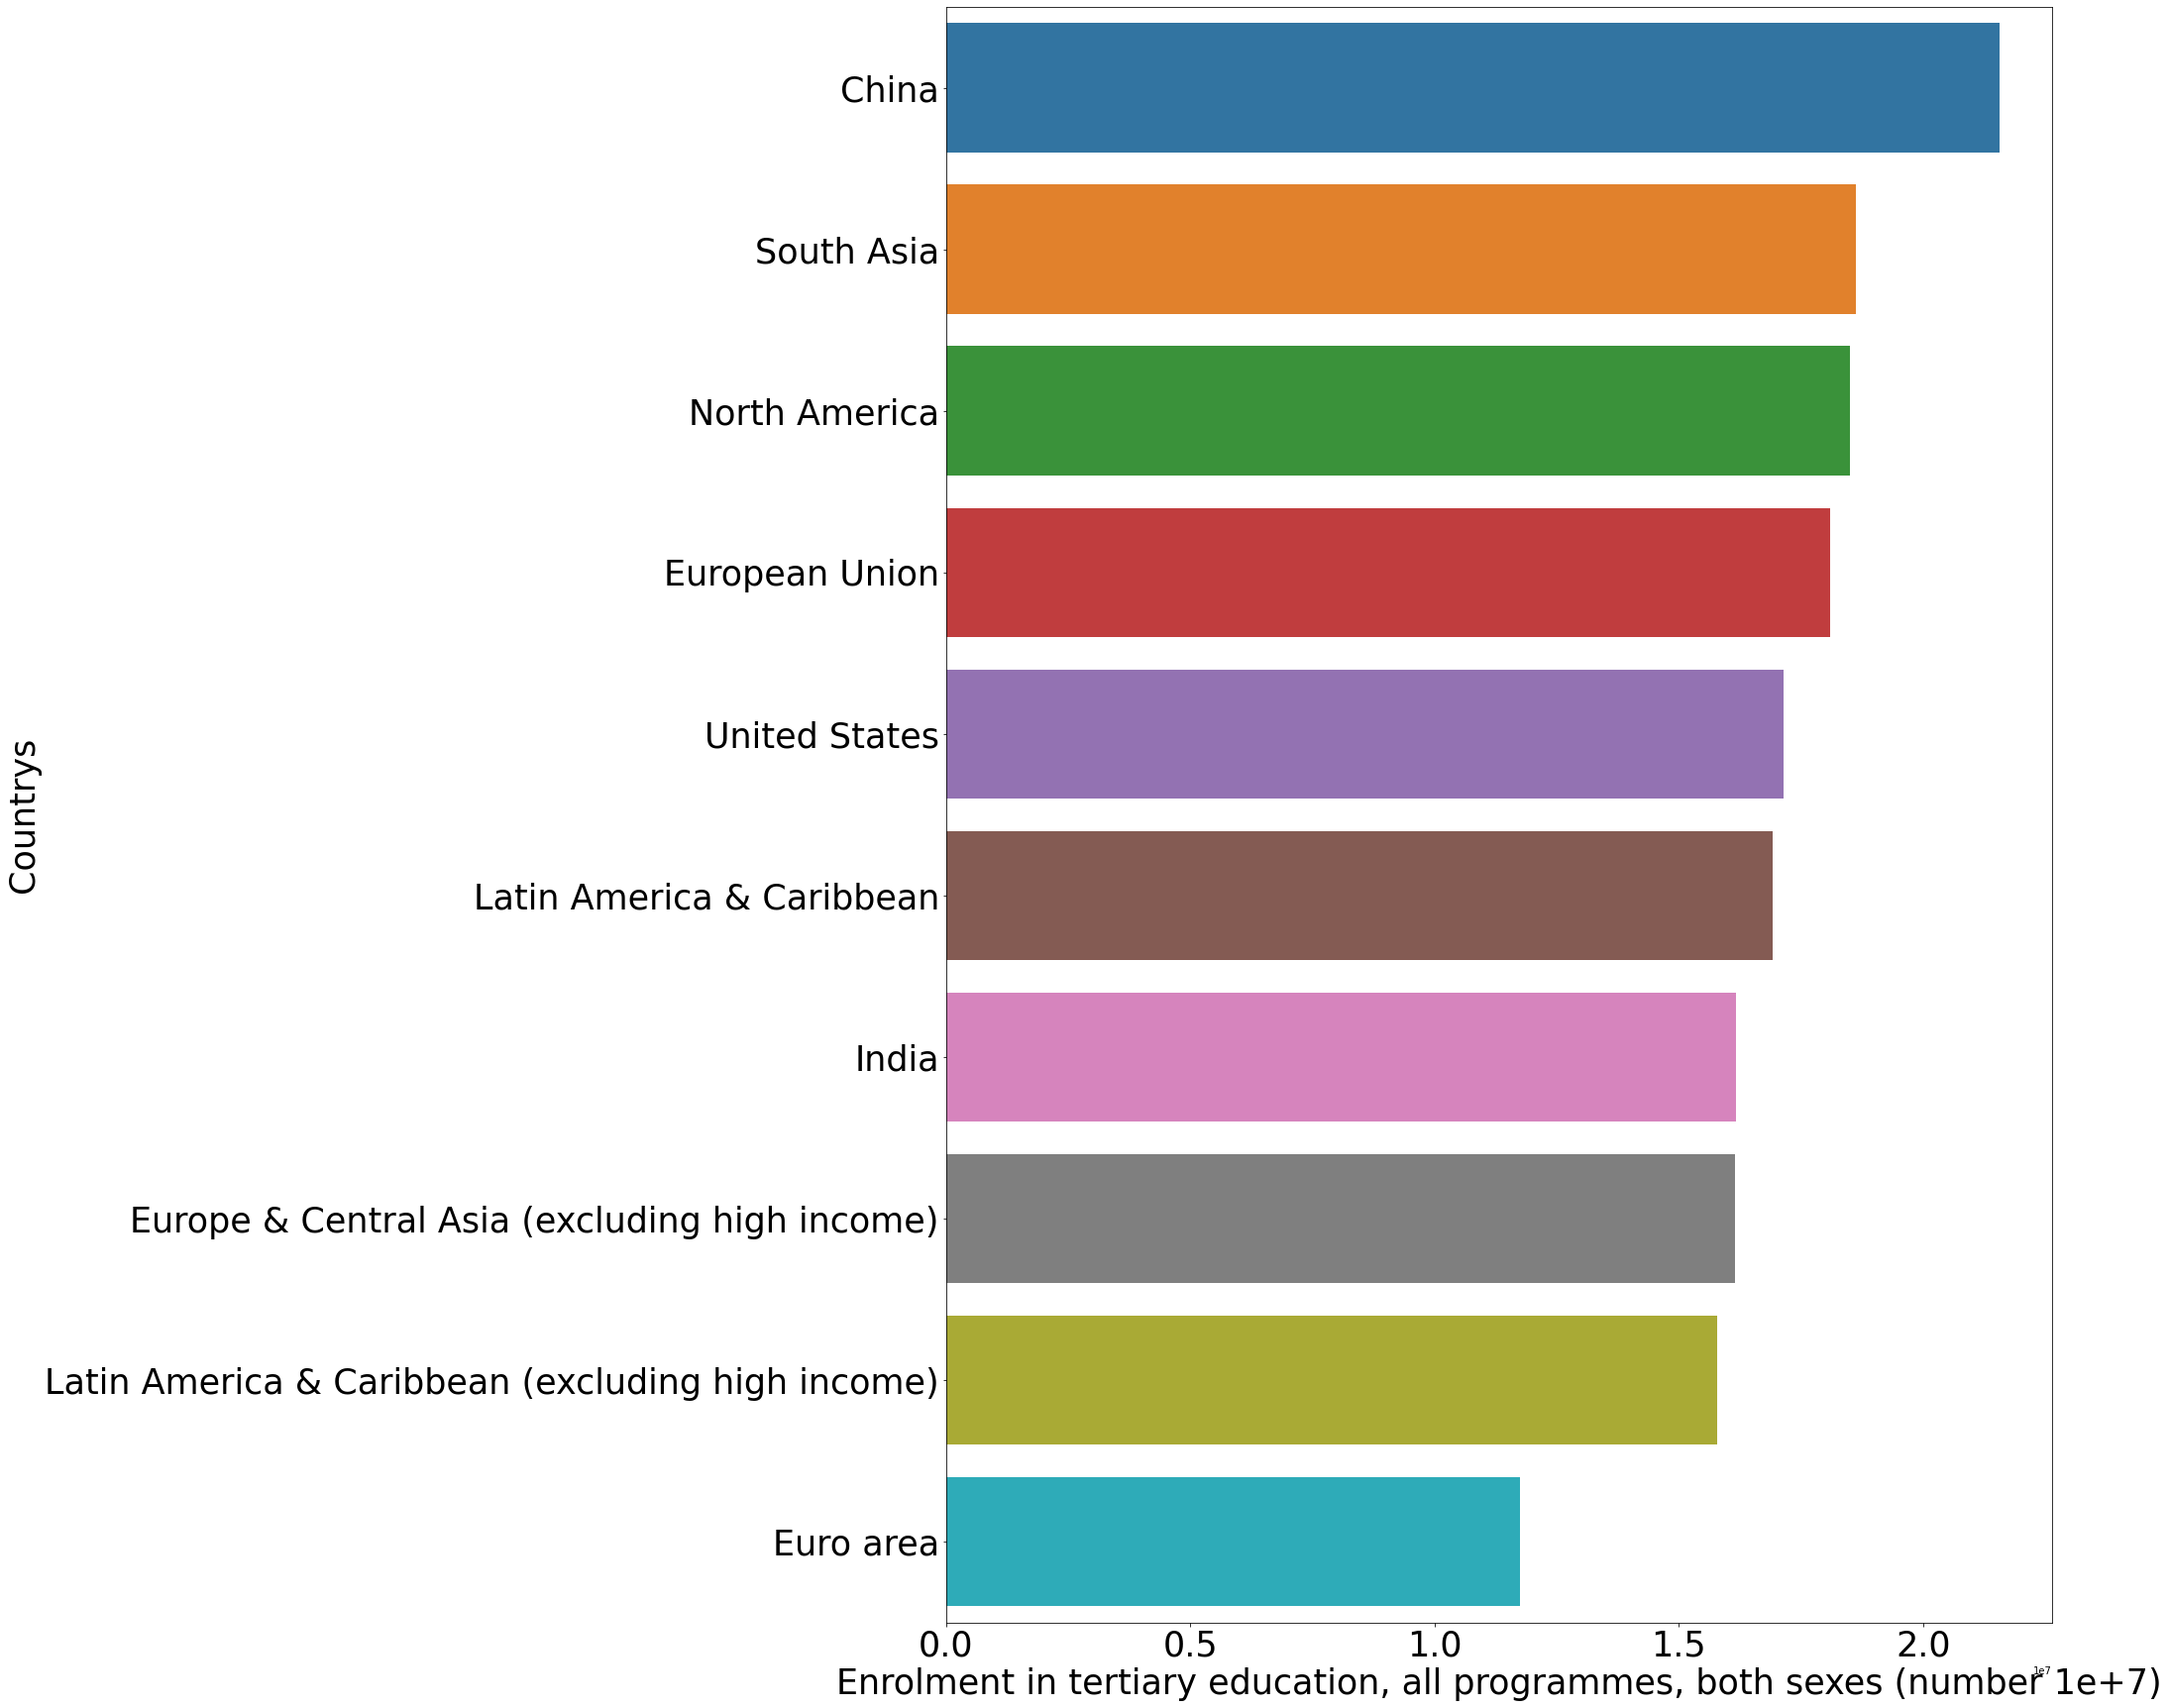

In [20]:
# fonction pour tracer la courbe à l'ordre décroissant
def create_plot_moyen(indicator_code, begin, end, x_title, y_title):
    result_classe = result_df.sort_values(indicator_code + "-mean", ascending=False)
    figure = sns.barplot(data = result_classe[begin:end], y = "Country_Name", x = indicator_code + "-mean")
    plt.rcParams["figure.figsize"] = (20, 30)
    plt.yticks(
        rotation=0, 
        horizontalalignment='right',
        fontweight='light',
        fontsize=35 
    )
    plt.xticks(
        rotation=0, 
        fontweight='light',
        fontsize=35 
    )
    figure.set_xlabel(x_title, fontsize = 35)
    figure.set_ylabel(y_title, fontsize = 35)

create_plot_moyen(indicator_ter_mean, 
            10, 
            20,
            x_title="Enrolment in tertiary education, all programmes, both sexes (number 1e+7)",
            y_title= "Countrys")


# Calculer la moyen du nombre des élèves au lycée.

In [21]:
indicator_sec_mean = 'UIS.E.3'
result_df[indicator_sec_mean + "-mean"] = result_df.Country_Name.apply(compute_mean, indicator_code=indicator_sec_mean, start_year=1995, end_year=2016)

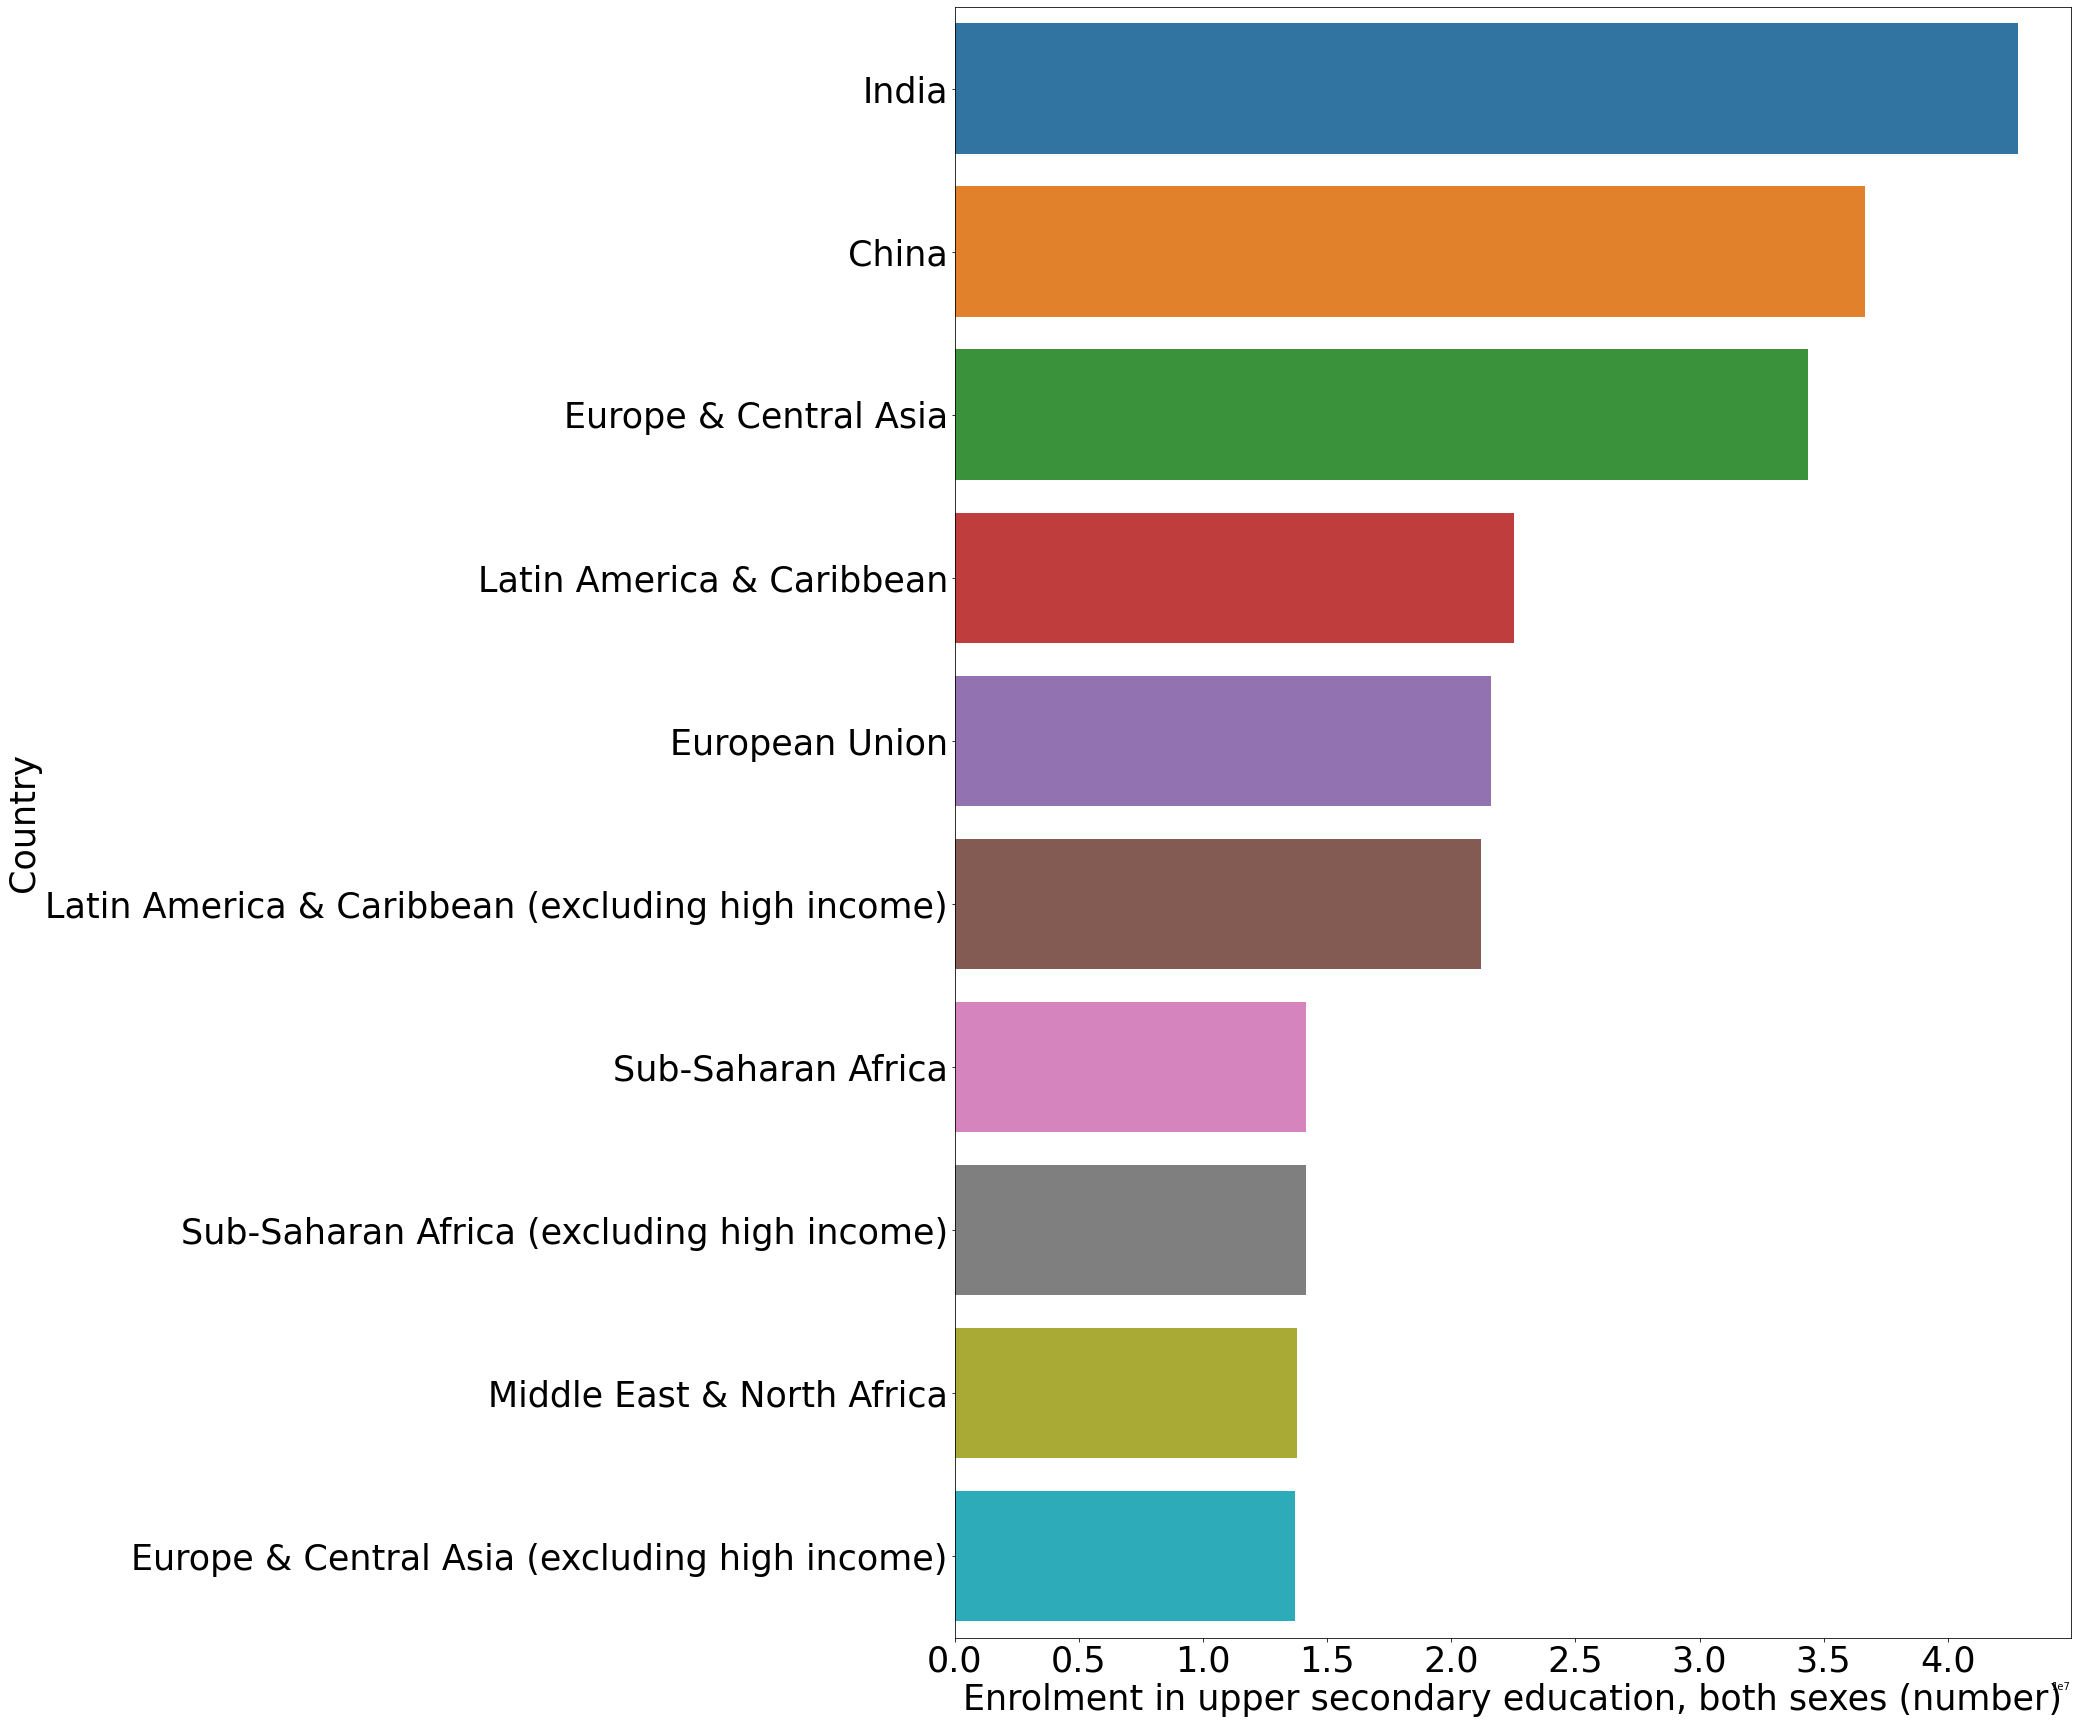

In [22]:
create_plot_moyen(indicator_sec_mean, 
            10, 
            20,
            x_title="Enrolment in upper secondary education, both sexes (number)",
            y_title="Country")

# Calculer la moyen : Internet users (per 100 people)

In [23]:
indicator_code_internet = "IT.NET.USER.P2"
result_df[indicator_code_internet + "-mean"] = result_df.Country_Name.apply(compute_mean, indicator_code=indicator_code_internet, start_year=1995, end_year=2016)

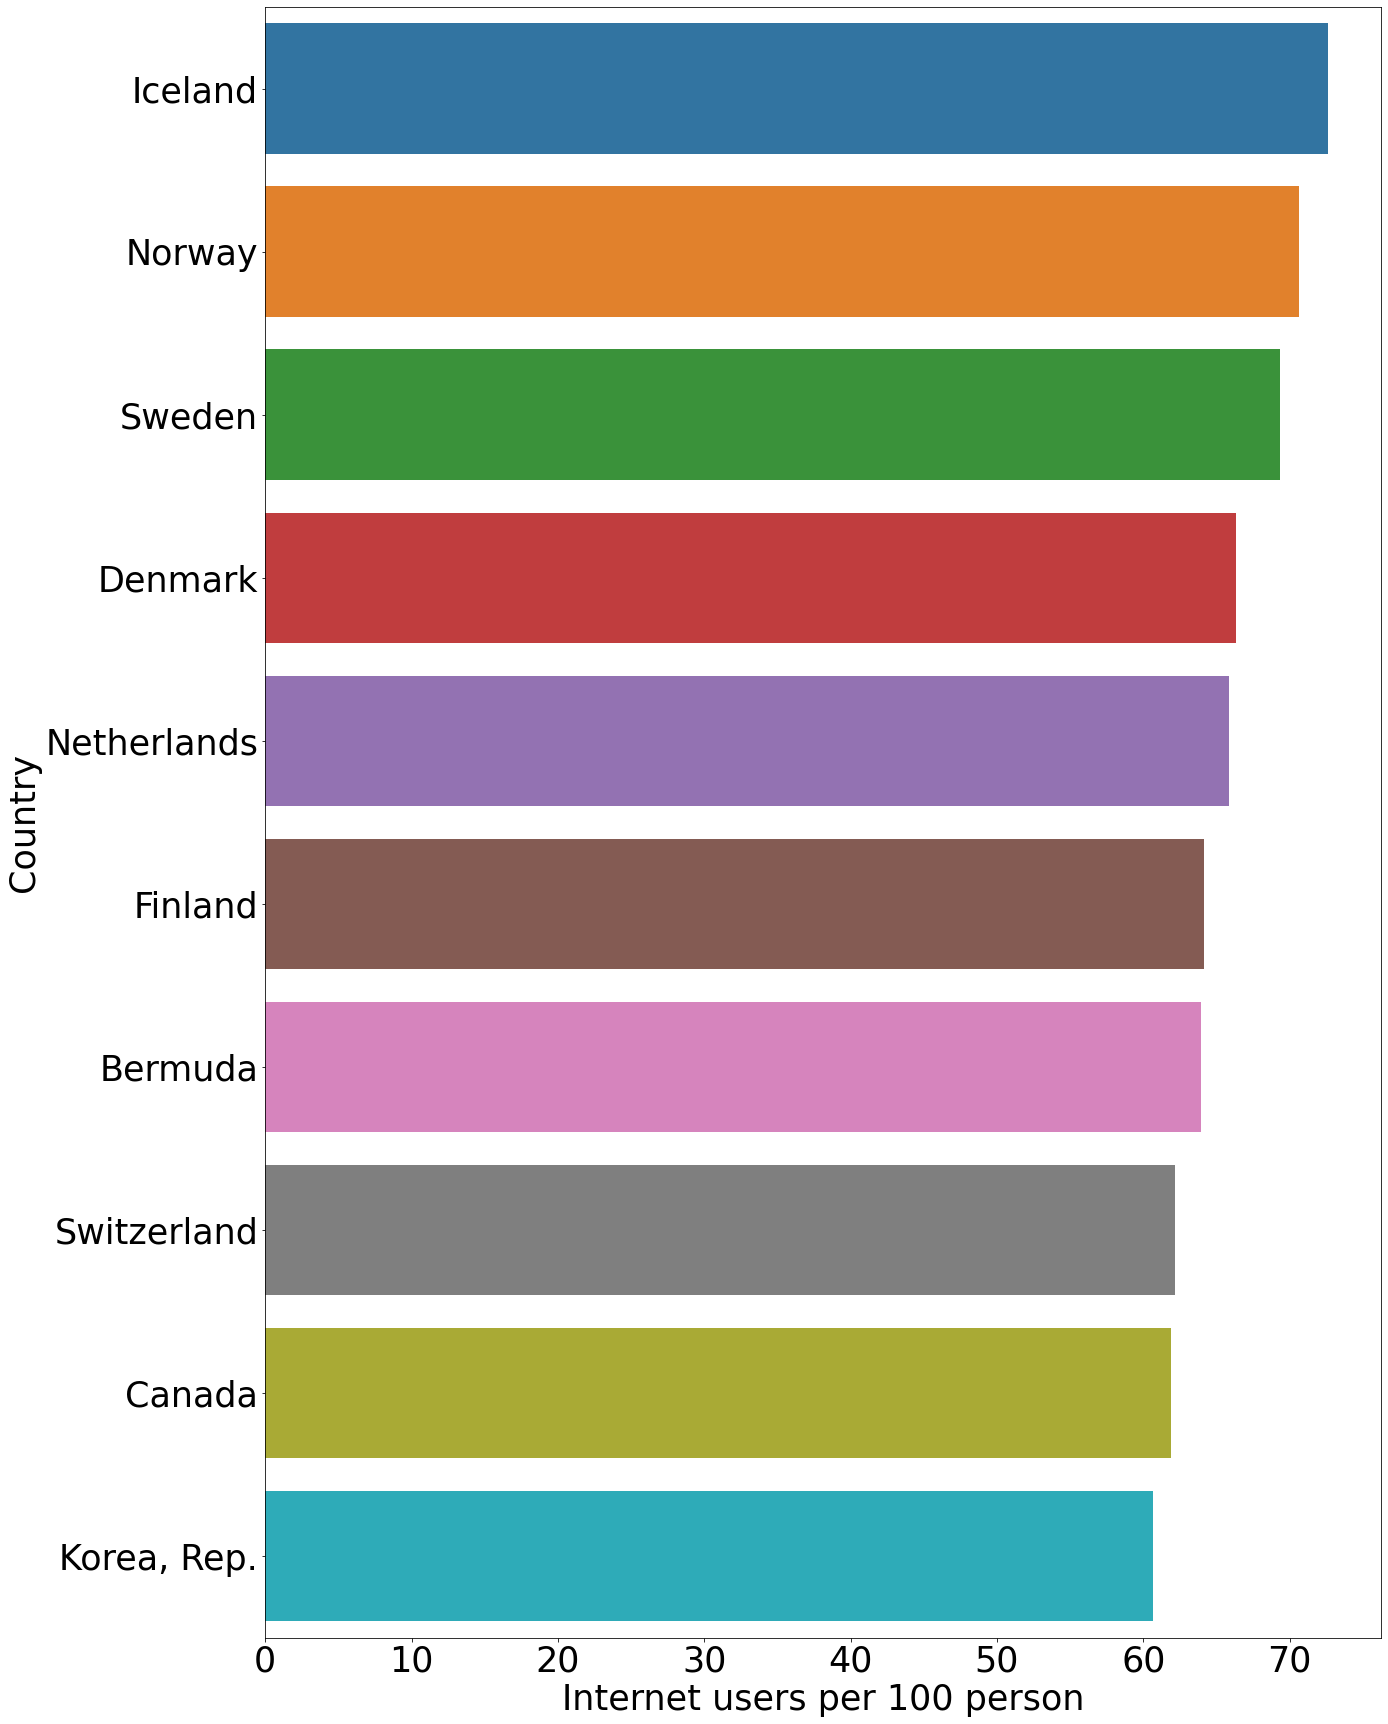

In [24]:
create_plot_moyen(indicator_code_internet, 
            0, 
            10,
            x_title="Internet users per 100 person",
            y_title="Country")

# Personal computers: IT.CMP.PCMP.P2.

In [27]:
indicator_code_computers = "IT.CMP.PCMP.P2"
result_df[indicator_code_computers + "-mean"] = result_df.Country_Name.apply(compute_mean, indicator_code=indicator_code_computers, start_year=1995, end_year=2016)


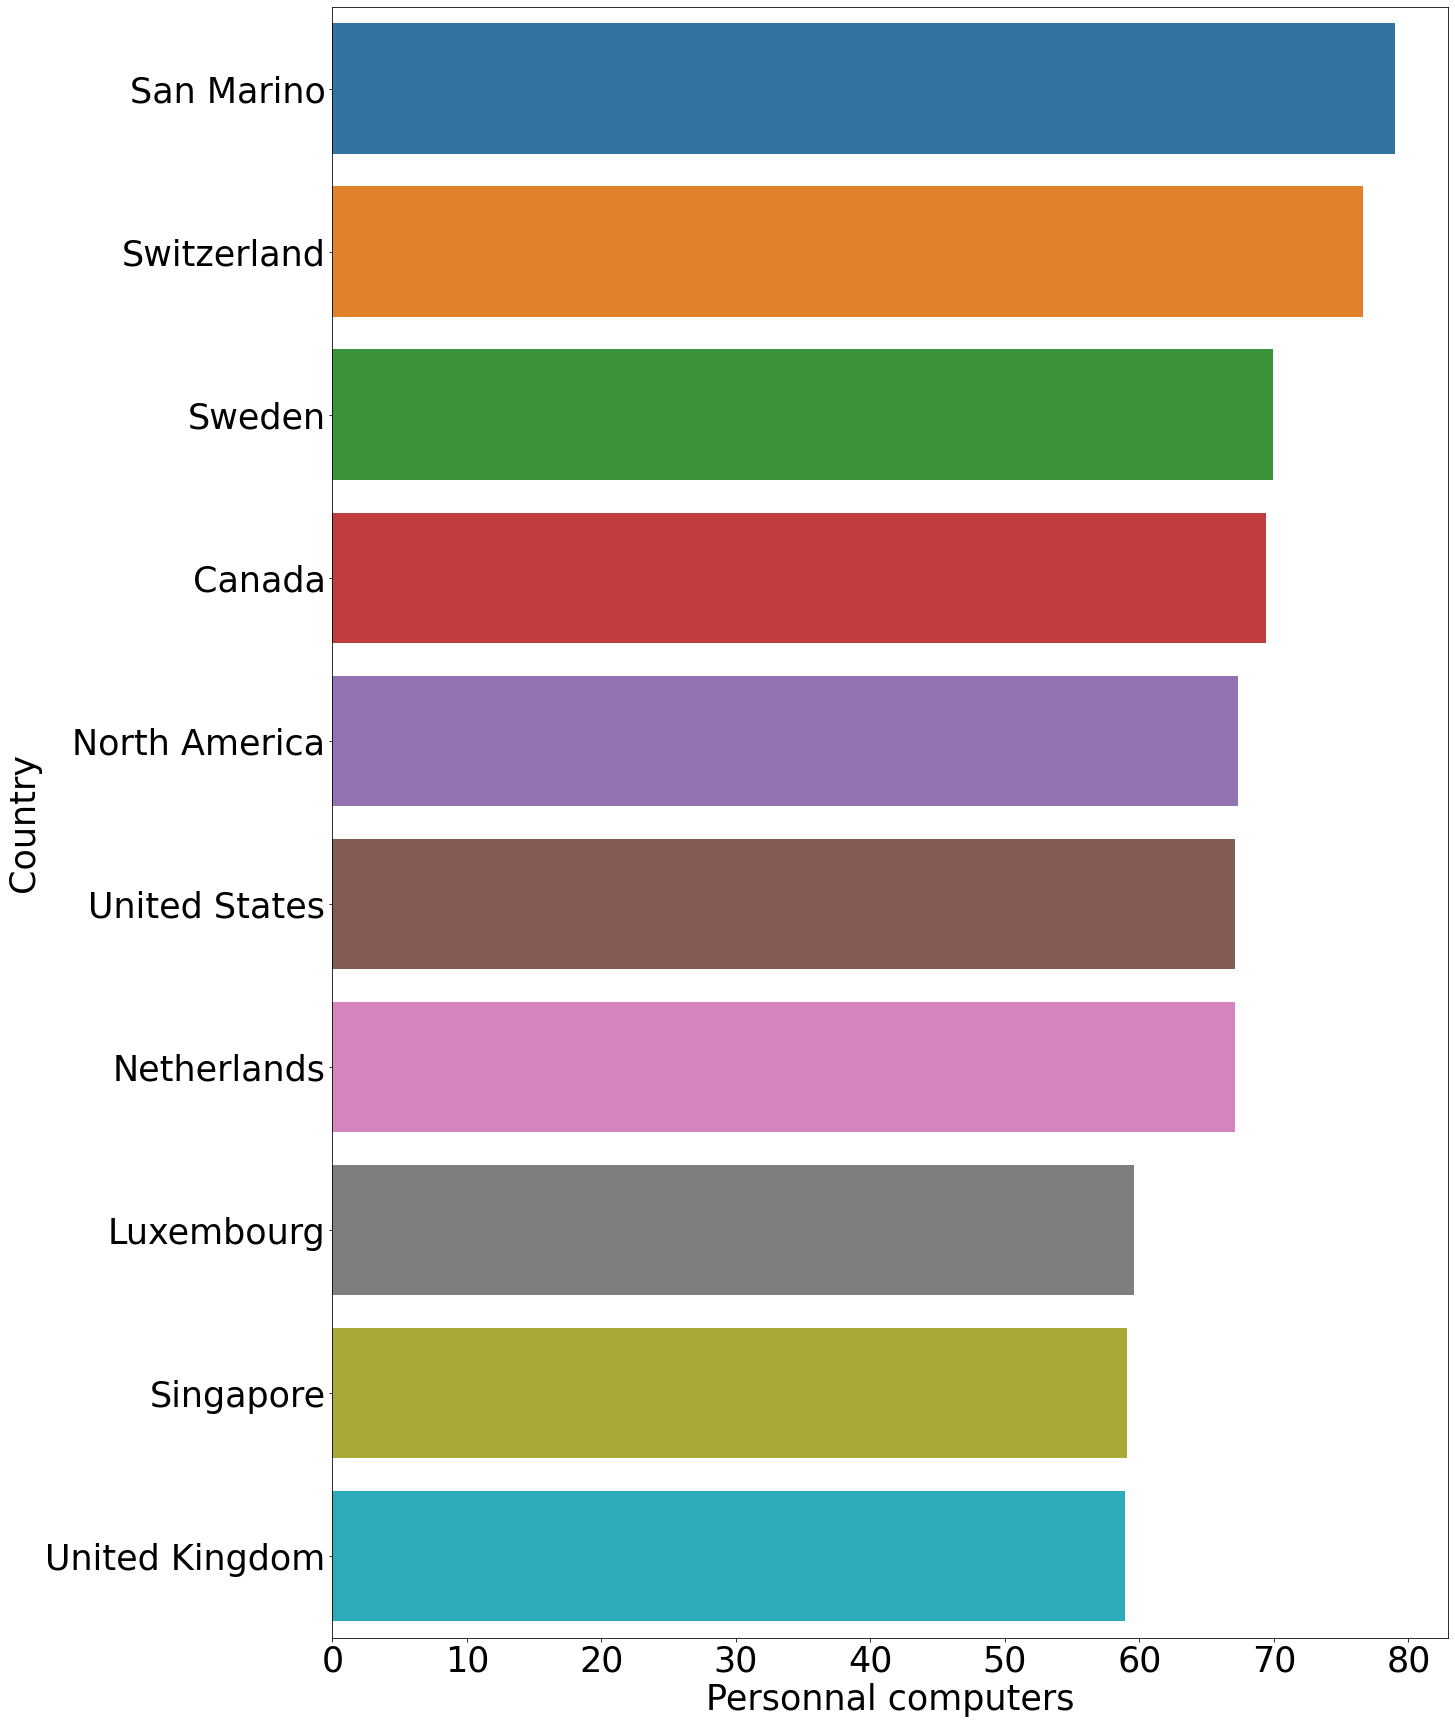

In [29]:
create_plot_moyen(indicator_code_computers, 
            0, 
            10,
            x_title="Personnal computers",
            y_title="Country")

# Le moyen : Gross enrolment ratio, upper secondary, both sexes (%): SE.SEC.ENRR.UP


In [30]:
indicator_gross_enrolmentsec = "SE.SEC.ENRR.UP"
result_df[indicator_gross_enrolmentsec + "-mean"] = result_df.Country_Name.apply(compute_mean, indicator_code=indicator_gross_enrolmentsec, start_year=1995, end_year=2016)

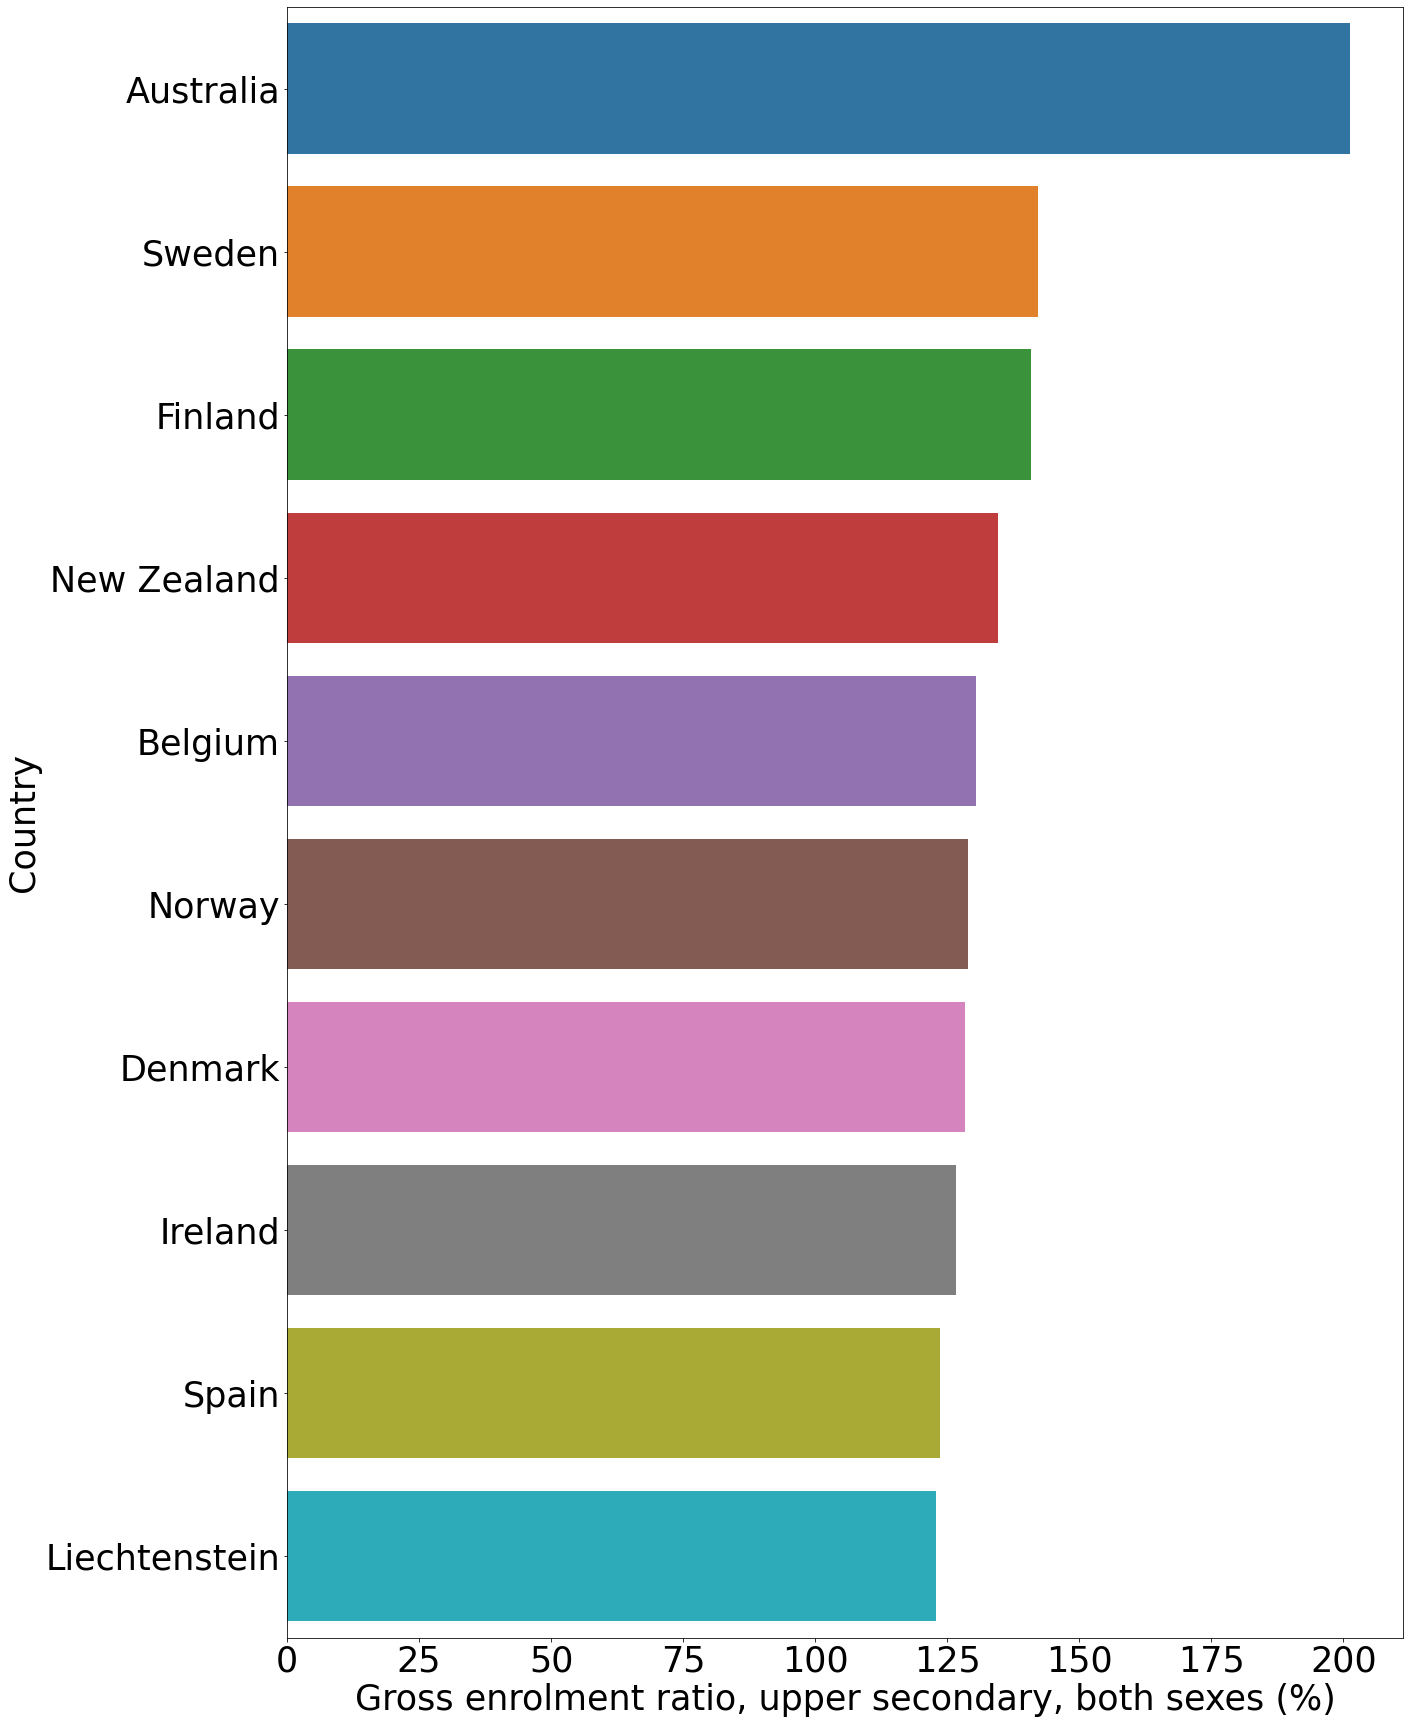

In [31]:
create_plot_moyen(indicator_gross_enrolmentsec, 
            0, 
            10,
            x_title="Gross enrolment ratio, upper secondary, both sexes (%)",
            y_title="Country")

# Le moyen : Gross enrolment ratio, tertiary, both sexes (%): SE.TER.ENRR

In [32]:
indicator_gross_enrolmentter = "SE.TER.ENRR"
result_df[indicator_gross_enrolmentter + "-mean"] = result_df.Country_Name.apply(compute_mean, indicator_code=indicator_gross_enrolmentter, start_year=1995, end_year=2016)

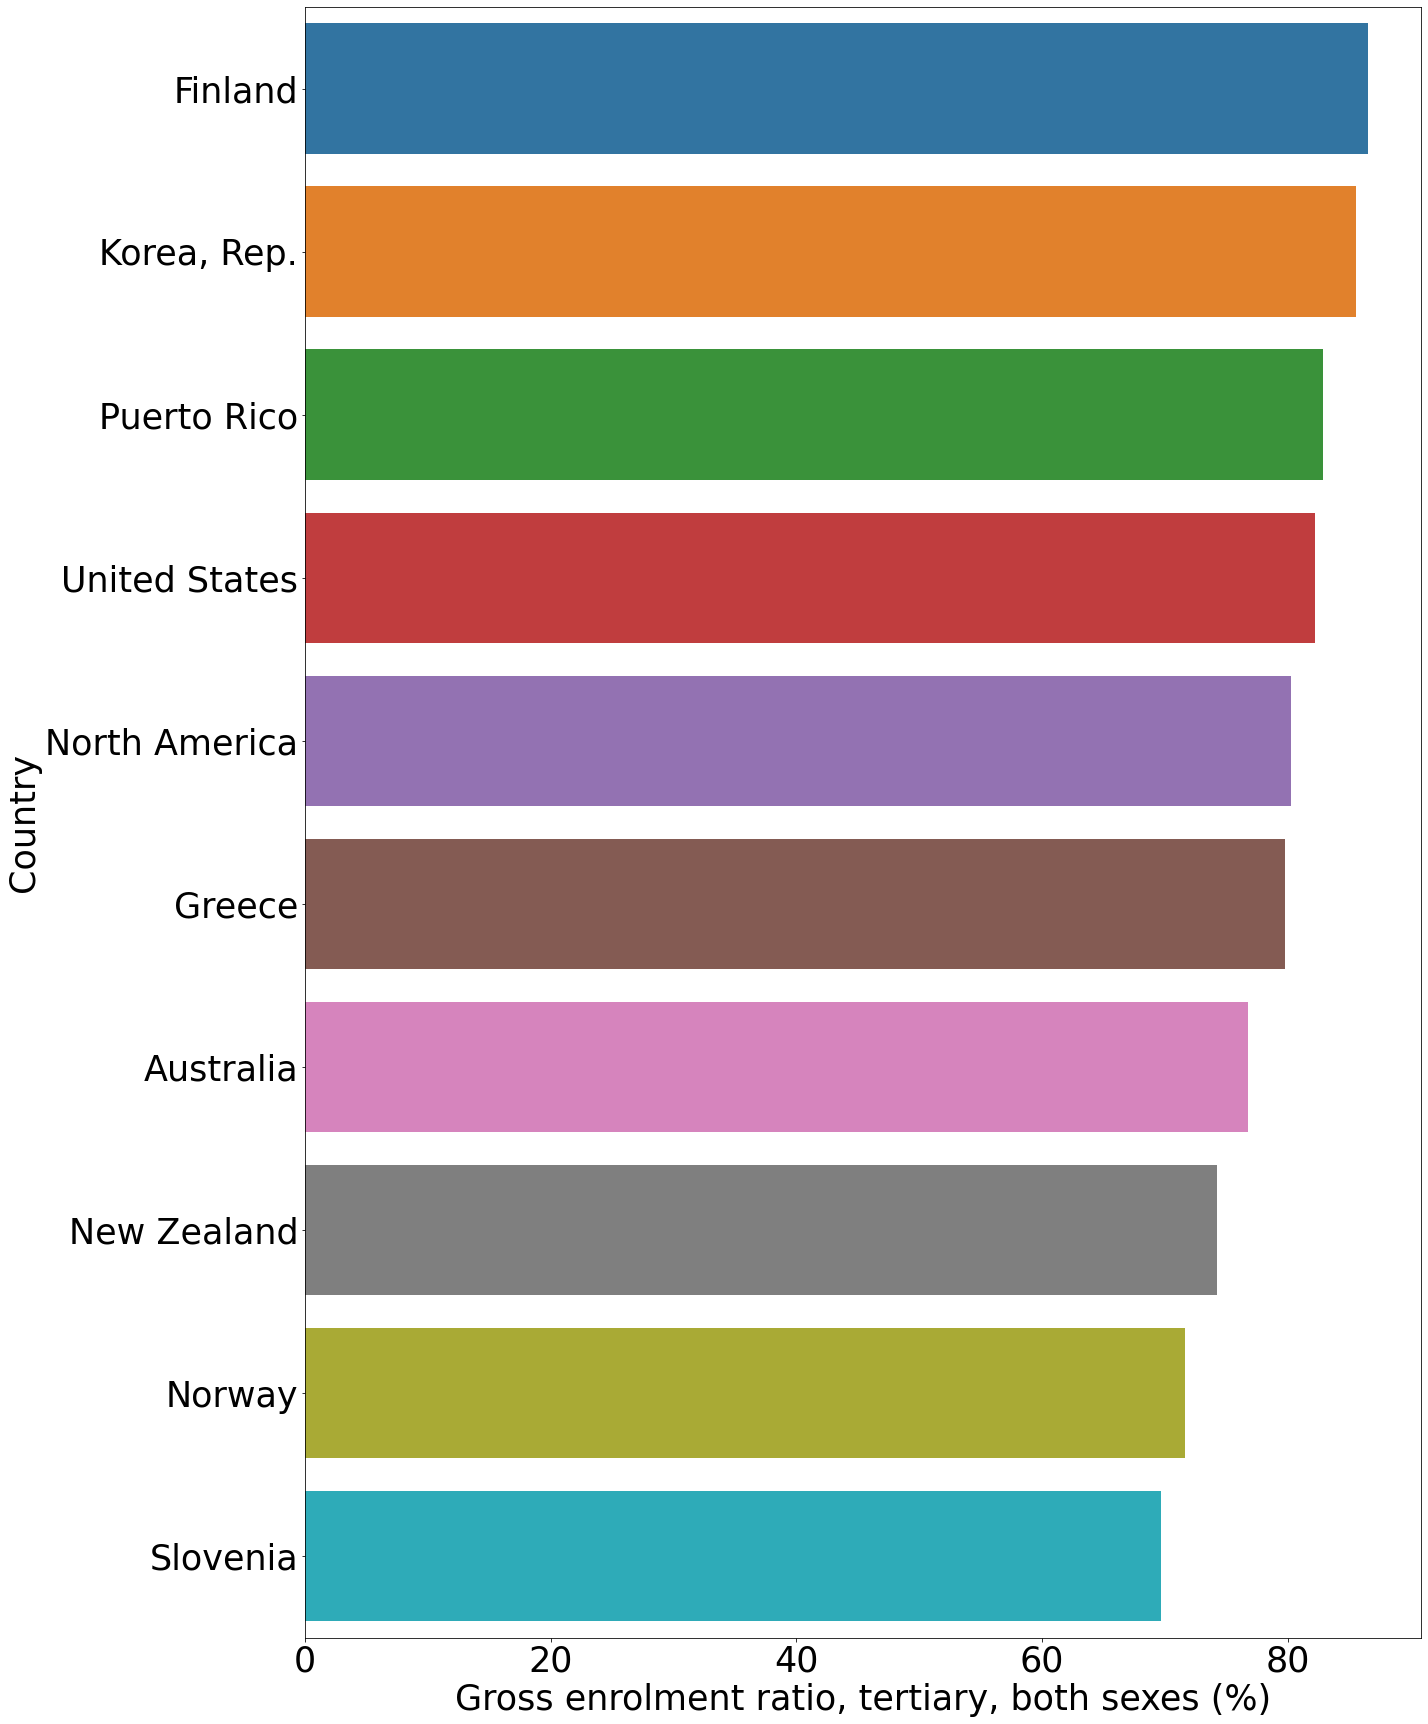

In [33]:
create_plot_moyen(indicator_gross_enrolmentter , 
            0, 
            10,
            x_title="Gross enrolment ratio, tertiary, both sexes (%)",
            y_title="Country")

# Le moyen : Government expenditure on tertiary education as % of GDP (%): UIS.XGDP.56.FSGOV


In [34]:
indicator_expenditure_ter = "UIS.XGDP.56.FSGOV"
result_df[indicator_expenditure_ter + "-mean"] = result_df.Country_Name.apply(compute_mean, indicator_code=indicator_expenditure_ter, start_year=1995, end_year=2016)

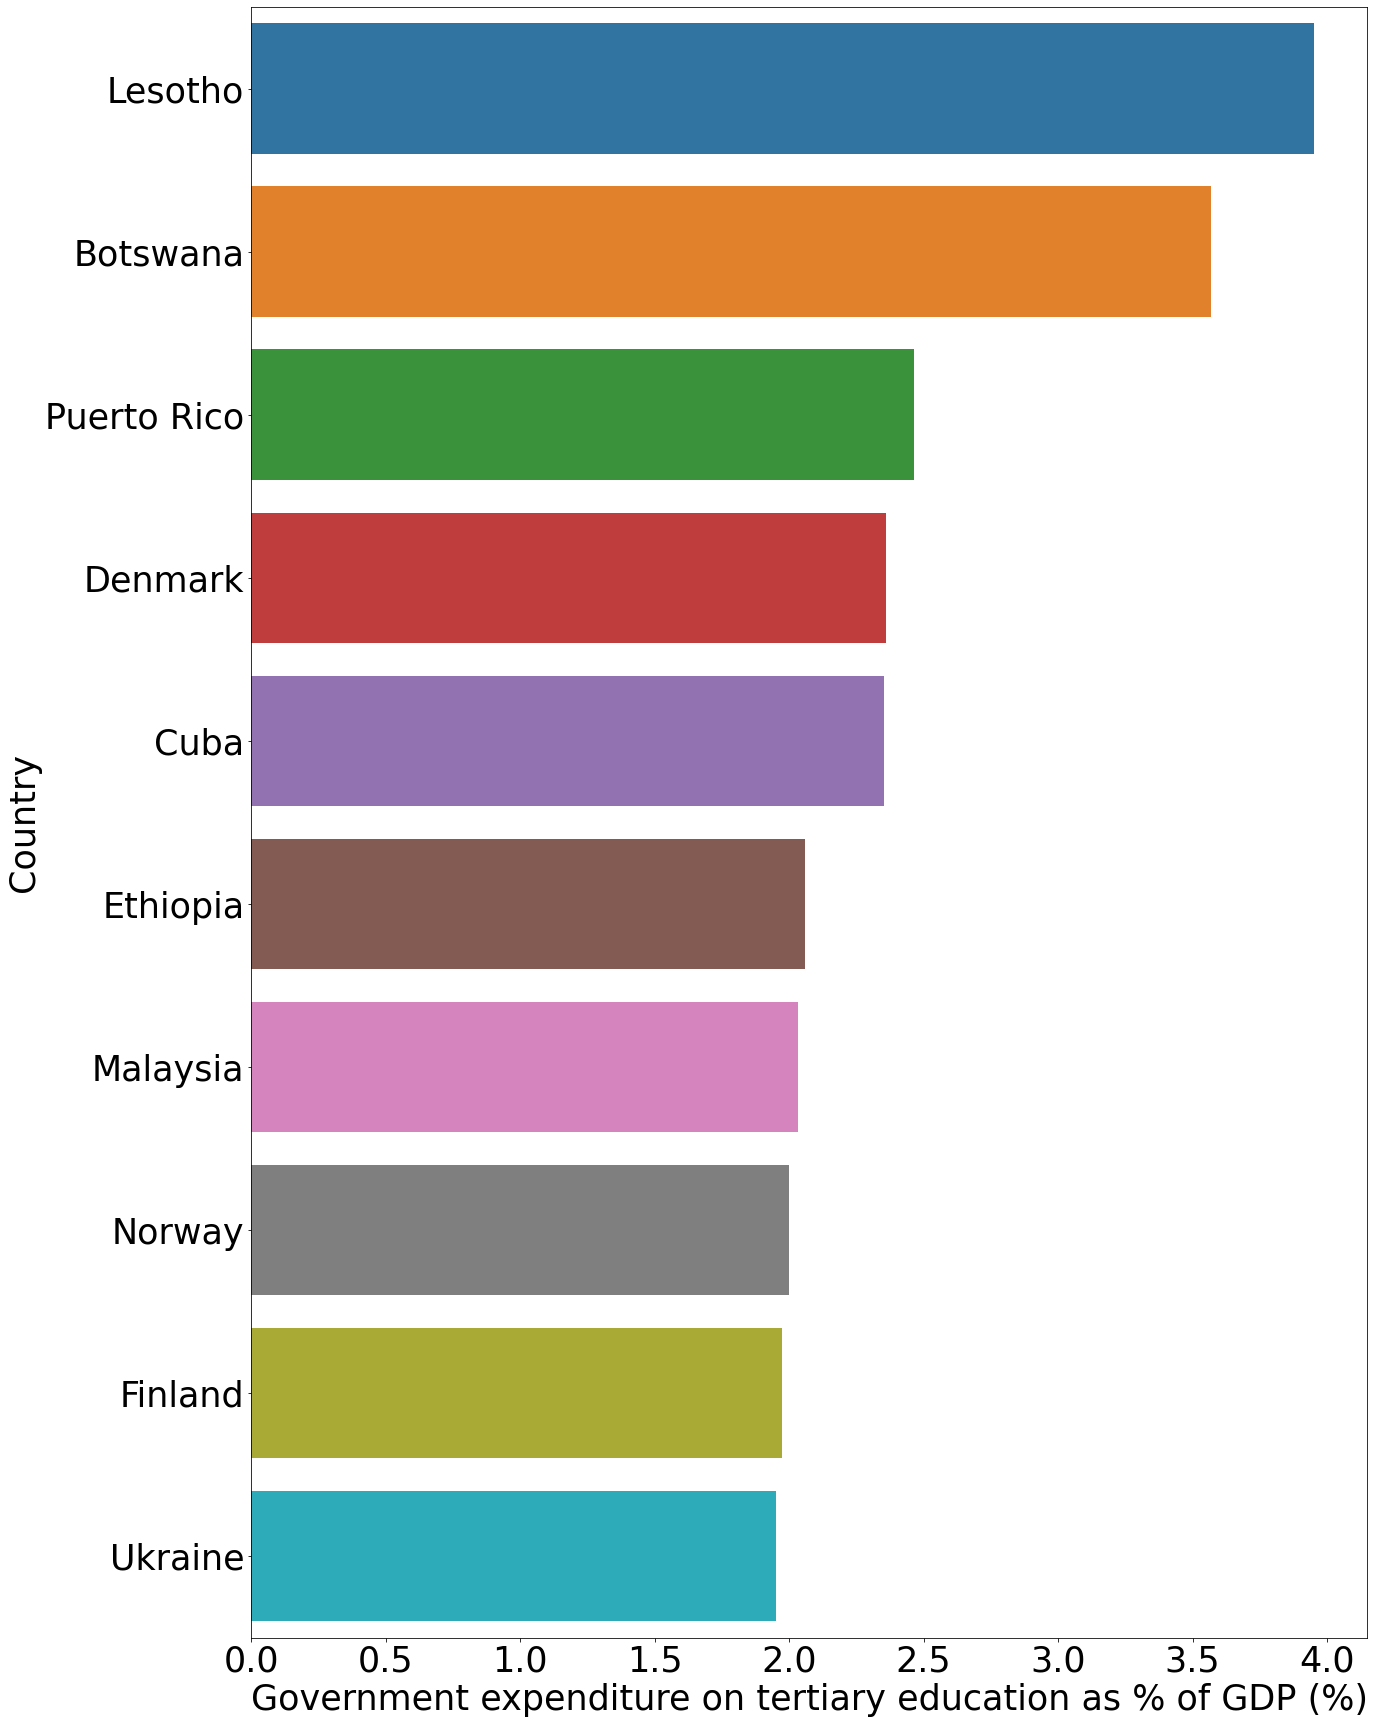

In [35]:
create_plot_moyen(indicator_expenditure_ter, 
            0, 
            10,
            x_title="Government expenditure on tertiary education as % of GDP (%)",
            y_title="Country")

# Government expenditure on secondary education as % of GDP (%): UIS.XGDP.23.FSGOV

In [36]:
indicator_expenditure_sec = "UIS.XGDP.23.FSGOV"
result_df[indicator_expenditure_sec + "-mean"] = result_df.Country_Name.apply(compute_mean, indicator_code=indicator_expenditure_sec, start_year=1995, end_year=2016)

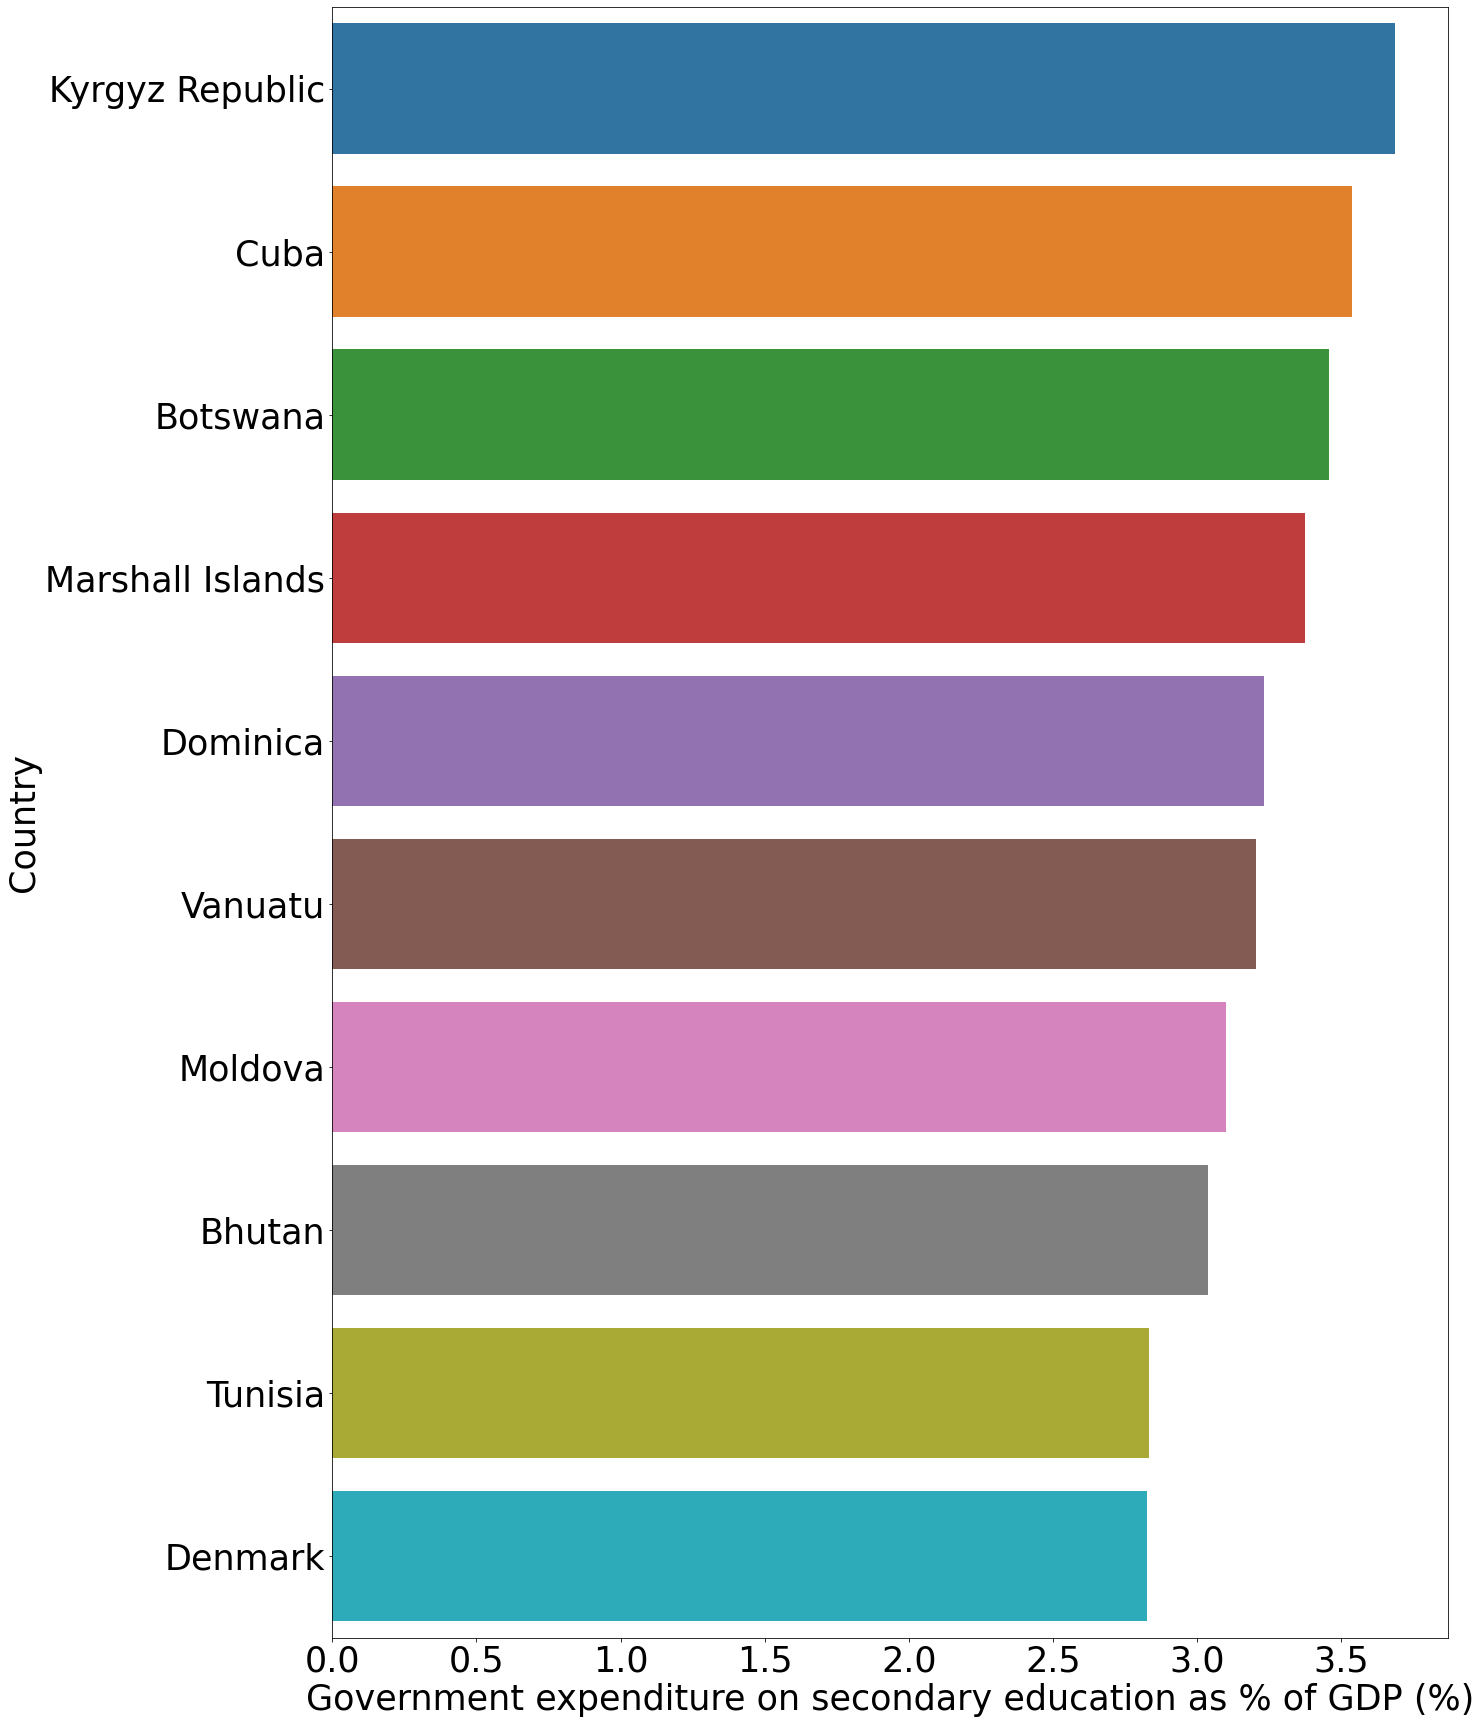

In [37]:
create_plot_moyen(indicator_expenditure_sec, 
            0, 
            10,
            x_title="Government expenditure on secondary education as % of GDP (%)",
            y_title="Country")

In [38]:
result_df
# On a des valeur NaN parce qu'il n'y a pas de donnés pour ce indicateur de ce pays, donc on ne regarde pas ce pays qui n'a pas de valeur pour cette indicateur. 

,Country_Name,SE.TER.ENRL-mean,UIS.E.3-mean,IT.NET.USER.P2-mean,IT.CMP.PCMP.P2-mean,SE.SEC.ENRR.UP-mean,SE.TER.ENRR-mean,UIS.XGDP.56.FSGOV-mean,UIS.XGDP.23.FSGOV-mean
0,Arab World,6.955158e+06,1.001861e+07,15.038962,4.499038,49.103042,21.654569,NaN,NaN
1,East Asia & Pacific,4.259968e+07,5.586367e+07,21.141932,6.493649,56.095657,23.549922,NaN,NaN
2,East Asia & Pacific (excluding high income),3.394807e+07,4.806726e+07,16.896903,3.755189,52.098019,20.190962,NaN,NaN
3,Euro area,1.175261e+07,1.324229e+07,47.101005,40.899385,106.272575,59.566099,NaN,NaN
4,Europe & Central Asia,3.377407e+07,3.436815e+07,36.725208,26.085323,96.197293,53.936599,NaN,NaN
...,...,...,...,...,...,...,...,...,...
237,Virgin Islands (U.S.),2.725818e+03,NaN,27.416755,2.757260,NaN,NaN,NaN,NaN
238,West Bank and Gaza,1.428141e+05,1.203423e+05,21.250516,5.107253,63.763718,36.968246,NaN,NaN
239,"Yemen, Rep.",1.977077e+05,5.853606e+05,7.379372,1.821012,37.484415,9.204133,NaN,0.85512
240,Zambia,3.117041e+04,NaN,6.532586,1.002384,NaN,2.674779,0.423318,0.30528


# Z-score pour comparer les différents indicateurs avec différents unités.

Pour déterminer les payes, mon idée est de faire un score pour chaque pays et chaque colonne de (result_df). Le méthode que je vais utiliser est Z-score pour standaliser les données (StandardScaler).

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
result_scaler = result_df.loc[:, "SE.TER.ENRL-mean":"UIS.XGDP.23.FSGOV-mean"]

scaler = scaler.fit(result_scaler)
StandardScaler()
result_z_score = pd.DataFrame(scaler.transform(result_scaler))
result_z_score["Country_Name"] = result_df["Country_Name"]

result_z_score.columns = ['SE.TER.ENRL-mean', 'UIS.E.3-mean', 'IT.NET.USER.P2-mean', 'IT.CMP.PCMP.P2-mean', 'SE.SEC.ENRR.UP-mean', 'SE.TER.ENRR-mean', 'UIS.XGDP.56.FSGOV-mean', 'UIS.XGDP.23.FSGOV-mean', 'Country_Name']
result_z_score = result_z_score[['Country_Name', 'SE.TER.ENRL-mean', 'UIS.E.3-mean', 'IT.NET.USER.P2-mean', 'IT.CMP.PCMP.P2-mean', 'SE.SEC.ENRR.UP-mean', 'SE.TER.ENRR-mean', 'UIS.XGDP.56.FSGOV-mean', 'UIS.XGDP.23.FSGOV-mean']]
result_z_score

,Country_Name,SE.TER.ENRL-mean,UIS.E.3-mean,IT.NET.USER.P2-mean,IT.CMP.PCMP.P2-mean,SE.SEC.ENRR.UP-mean,SE.TER.ENRR-mean,UIS.XGDP.56.FSGOV-mean,UIS.XGDP.23.FSGOV-mean
0,Arab World,0.184179,0.182663,-0.412038,-0.510058,-0.464199,-0.285172,NaN,NaN
1,East Asia & Pacific,2.522106,2.253546,-0.085859,-0.398566,-0.257792,-0.201762,NaN,NaN
2,East Asia & Pacific (excluding high income),1.954646,1.901372,-0.312739,-0.551637,-0.375794,-0.349583,NaN,NaN
3,Euro area,0.498844,0.328280,1.301549,1.524615,1.223321,1.383234,NaN,NaN
4,Europe & Central Asia,1.943234,1.282564,0.747005,0.696552,0.925920,1.135492,NaN,NaN
...,...,...,...,...,...,...,...,...,...
237,Virgin Islands (U.S.),-0.271832,NaN,0.249505,-0.607419,NaN,NaN,NaN,NaN
238,West Bank and Gaza,-0.262644,-0.264456,-0.080055,-0.476061,-0.031448,0.388750,NaN,NaN
239,"Yemen, Rep.",-0.259043,-0.243450,-0.821412,-0.659752,-0.807155,-0.833090,NaN,-0.885055
240,Zambia,-0.269967,NaN,-0.866670,-0.705511,NaN,-1.120433,-0.833858,-1.625720


# En fin, afin de classer ces pays, je fais un somme de tous les colonnes pour obtenir un score seul pour chaque pays.

In [42]:
sum_score = result_z_score["SE.TER.ENRL-mean"] + result_z_score["UIS.E.3-mean"] + result_z_score['IT.NET.USER.P2-mean'] + result_z_score['IT.CMP.PCMP.P2-mean'] + result_z_score['SE.SEC.ENRR.UP-mean'] + result_z_score['SE.TER.ENRR-mean'] + result_z_score['UIS.XGDP.56.FSGOV-mean'] + result_z_score['UIS.XGDP.23.FSGOV-mean']
result_z_score['z-score total'] = sum_score

In [56]:
# classer les pays selon le score
score_pays = result_z_score.loc[: ,'Country_Name' : 'z-score total']
class_score_pays = score_pays.sort_values('z-score total', ascending=False)
class_score_pays.head(30)

,Country_Name,SE.TER.ENRL-mean,UIS.E.3-mean,IT.NET.USER.P2-mean,IT.CMP.PCMP.P2-mean,SE.SEC.ENRR.UP-mean,SE.TER.ENRR-mean,UIS.XGDP.56.FSGOV-mean,UIS.XGDP.23.FSGOV-mean,z-score total
212,Sweden,-0.246616,-0.249269,2.488443,3.149407,2.282451,1.720471,1.697934,1.222043,12.064864
78,Denmark,-0.256978,-0.258430,2.328002,2.177833,1.874424,1.799064,2.531817,1.769897,11.965630
171,Norway,-0.257885,-0.259455,2.558019,2.276541,1.893092,1.915929,1.902696,1.176332,11.205269
91,Finland,-0.253363,-0.257286,2.212048,1.712552,2.244863,2.570721,1.856571,0.929285,11.015392
35,Australia,-0.198547,-0.219764,1.870999,2.196714,4.025200,2.141874,0.488147,0.452342,10.756966
231,United States,0.852376,0.241716,1.842187,2.990117,0.706285,2.380724,0.746518,0.460281,10.220204
166,New Zealand,-0.257487,-0.258670,2.002337,1.701647,2.061652,2.028943,1.343755,1.417857,10.040034
164,Netherlands,-0.231983,-0.239095,2.305438,2.989734,1.611273,1.486598,0.939996,0.754783,9.616745
60,Canada,-0.187549,-0.199220,2.093272,3.119225,1.271556,1.537760,1.446027,-0.161646,8.919425
112,Iceland,-0.271082,-0.268925,2.665680,1.772924,1.581360,1.552696,0.781640,1.094203,8.908495


# Quels sont les pays avec un fort potentiel de clients pour nos services ?
Réponse: Selon cette classe, les pays que je vais choisir sont: Sweden, Denmark, Norway, Finland, Australia, United States, New Zealand,  Netherlands, Canada, Iceland, 
# Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
Réponse: Voici les courbes pour ces pays

# 1. Sweden

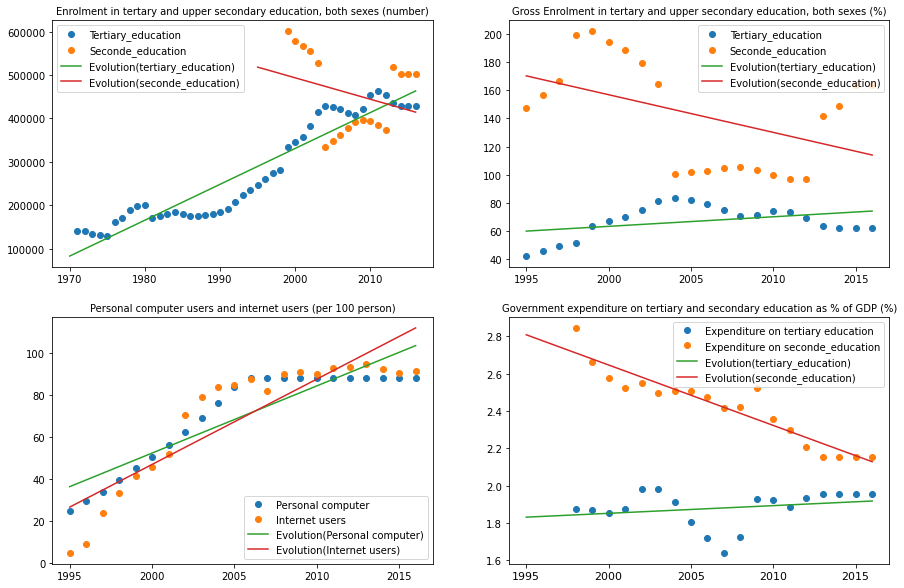

In [45]:
import scipy.stats as st
import statsmodels.api as sm

# Fonction pour tracer les courbes

def build_plot_for_country(pays, start_year1, end_years1, start_year2, end_years2):
    fig, axs = plt.subplots(2, 2)
    ######                       #####
    ###### 1st pair of indicator #####
    ######                       #####
    seconde_education = new_data.loc[(new_data['Country Name'] == pays)&(new_data['Indicator Code'] == 'UIS.E.3'), str(start_year1):str(end_years1)]
    seconde_education_transpose = seconde_education.T
    seconde_education_transpose.columns = ['UIS.E.3']
    seconde_education_transpose["Year"] = range(start_year1, end_years1 + 1)
    seconde_education_transpose_nonan = seconde_education_transpose.loc[~seconde_education_transpose['UIS.E.3'].isnull(), :]

    tertiary_education = new_data.loc[(new_data['Country Name'] == pays)&(new_data['Indicator Code'] == 'SE.TER.ENRL'), str(start_year2):str(end_years2)]
    tertiary_education_transpose = tertiary_education.T
    tertiary_education_transpose.columns = ['SE.TER.ENRL']
    tertiary_education_transpose["Year"] = range(start_year2, end_years2 + 1)
    tertiary_education_transpose_nonan = tertiary_education_transpose.loc[~tertiary_education_transpose['SE.TER.ENRL'].isnull(), :]

    plt.rcParams["figure.figsize"] = (15, 10)
    plt.xticks(
        rotation=0, 
        fontweight='light',
        fontsize=11  
    )

    X1 = tertiary_education_transpose_nonan[['Year']]
    Y1 = tertiary_education_transpose_nonan['SE.TER.ENRL']
    X2 = seconde_education_transpose_nonan[['Year']]
    Y2 = seconde_education_transpose_nonan['UIS.E.3']

    X1 = X1.copy() 
    X1['intercept'] = 1.
    X2 = X2.copy()
    X2['intercept'] = 1.

    result = sm.OLS(Y1, X1).fit() 
    a_ter,b_ter = result.params['Year'],result.params['intercept']
    result2 = sm.OLS(Y2, X2).fit()
    a_sec,b_sec = result2.params['Year'],result2.params['intercept']

    axs[0, 0].plot(tertiary_education_transpose_nonan['Year'], tertiary_education_transpose_nonan['SE.TER.ENRL'], "o")
    axs[0, 0].plot(seconde_education_transpose_nonan['Year'], seconde_education_transpose_nonan['UIS.E.3'], "o")
    axs[0, 0].plot(np.arange(start_year2,end_years2 + 1),[a_ter*x+b_ter for x in np.arange(start_year2, end_years2 + 1)])
    axs[0, 0].plot(np.arange(start_year1,end_years1 + 1),[a_sec*x+b_sec for x in np.arange(start_year1,end_years1 + 1)])
    axs[0, 0].legend(["Tertiary_education", "Seconde_education","Evolution(tertiary_education)", "Evolution(seconde_education)"], fontsize = 10)
    axs[0, 0].set_title("Enrolment in tertary and upper secondary education, both sexes (number)",fontsize = 10)

    ######                       #####
    ###### 2nd pair of indicator #####
    ######                       #####
    inscription_seconde = new_data.loc[(new_data['Country Name'] == pays)&(new_data['Indicator Code'] == 'SE.SEC.ENRR.UP'), str(start_year1):str(end_years1)]
    inscription_seconde_transpose = inscription_seconde.T
    inscription_seconde_transpose.columns = ['SE.SEC.ENRR.UP']
    inscription_seconde_transpose["Year"] = range(start_year1, end_years1 + 1)
    inscription_seconde_transpose_nonan = inscription_seconde_transpose.loc[~inscription_seconde_transpose['SE.SEC.ENRR.UP'].isnull(), :]

    inscription_tertiary = new_data.loc[(new_data['Country Name'] == pays)&(new_data['Indicator Code'] == 'SE.TER.ENRR'), str(start_year1):str(end_years1)]
    inscription_tertiary_transpose = inscription_tertiary.T
    inscription_tertiary_transpose.columns = ['SE.TER.ENRR']
    inscription_tertiary_transpose["Year"] = range(start_year1, end_years1 + 1)
    inscription_tertiary_transpose_nonan = inscription_tertiary_transpose.loc[~inscription_tertiary_transpose['SE.TER.ENRR'].isnull(), :]

    plt.rcParams["figure.figsize"] = (15, 10)
    plt.xticks(
        rotation=0, 
        fontweight='light',
        fontsize=11  
    )

    X1 = inscription_tertiary_transpose_nonan[['Year']]
    Y1 = inscription_tertiary_transpose_nonan['SE.TER.ENRR']
    X2 = inscription_seconde_transpose_nonan[['Year']]
    Y2 = inscription_seconde_transpose_nonan['SE.SEC.ENRR.UP']

    X1 = X1.copy() 
    X1['intercept'] = 1.
    X2 = X2.copy()
    X2['intercept'] = 1.

    result = sm.OLS(Y1, X1).fit() 
    a_ter,b_ter = result.params['Year'],result.params['intercept']
    result2 = sm.OLS(Y2, X2).fit()
    a_sec,b_sec = result2.params['Year'],result2.params['intercept']

    axs[0, 1].plot(inscription_tertiary_transpose_nonan['Year'], inscription_tertiary_transpose_nonan['SE.TER.ENRR'], "o")
    axs[0, 1].plot(inscription_seconde_transpose_nonan['Year'], inscription_seconde_transpose_nonan['SE.SEC.ENRR.UP'], "o")
    axs[0, 1].plot(np.arange(start_year1,end_years1 + 1),[a_ter*x+b_ter for x in np.arange(start_year1, end_years1 + 1)])
    axs[0, 1].plot(np.arange(start_year1,end_years1 + 1),[a_sec*x+b_sec for x in np.arange(start_year1,end_years1 + 1)])
    axs[0, 1].legend(["Tertiary_education", "Seconde_education","Evolution(tertiary_education)", "Evolution(seconde_education)"], fontsize = 10)
    axs[0, 1].set_title("Gross Enrolment in tertary and upper secondary education, both sexes (%)",fontsize = 10)

    ######                       #####
    ###### 3rd pair of indicator #####
    ######                       #####

    Internet_users = new_data.loc[(new_data['Country Name'] == pays)&(new_data['Indicator Code'] == 'IT.NET.USER.P2'), str(start_year1):str(end_years1)]
    Internet_users_transpose = Internet_users.T
    Internet_users_transpose.columns = ['IT.NET.USER.P2']
    Internet_users_transpose["Year"] = range(start_year1, end_years1 + 1)
    Internet_users_transpose_nonan = Internet_users_transpose.loc[~Internet_users_transpose['IT.NET.USER.P2'].isnull(), :]

    personal_computer = new_data.loc[(new_data['Country Name'] == pays)&(new_data['Indicator Code'] == 'IT.CMP.PCMP.P2'), str(start_year1):str(end_years1)]
    personal_computer_transpose = personal_computer.T
    personal_computer_transpose.columns = ['IT.CMP.PCMP.P2']
    personal_computer_transpose["Year"] = range(start_year1, end_years1 + 1)
    personal_computer_transpose_nonan = personal_computer_transpose.loc[~personal_computer_transpose['IT.CMP.PCMP.P2'].isnull(), :]

    plt.rcParams["figure.figsize"] = (15, 10)
    plt.xticks(
        rotation=0, 
        fontweight='light',
        fontsize=11  
    )

    X1 = personal_computer_transpose_nonan[['Year']]
    Y1 = personal_computer_transpose_nonan['IT.CMP.PCMP.P2']
    X2 = Internet_users_transpose_nonan[['Year']]
    Y2 = Internet_users_transpose_nonan['IT.NET.USER.P2']

    X1 = X1.copy() 
    X1['intercept'] = 1.
    X2 = X2.copy()
    X2['intercept'] = 1.

    result = sm.OLS(Y1, X1).fit() 
    a_com,b_com = result.params['Year'],result.params['intercept']
    result2 = sm.OLS(Y2, X2).fit()
    a_IT,b_IT = result2.params['Year'],result2.params['intercept']

    axs[1, 0].plot(personal_computer_transpose_nonan['Year'], personal_computer_transpose_nonan['IT.CMP.PCMP.P2'], "o")
    axs[1, 0].plot(Internet_users_transpose_nonan['Year'], Internet_users_transpose_nonan['IT.NET.USER.P2'], "o")
    axs[1, 0].plot(np.arange(start_year1,end_years1 + 1),[a_com*x+b_com for x in np.arange(start_year1, end_years1 + 1)])
    axs[1, 0].plot(np.arange(start_year1,end_years1 + 1),[a_IT*x+b_IT for x in np.arange(start_year1,end_years1 + 1)])
    axs[1, 0].legend(["Personal computer", "Internet users","Evolution(Personal computer)", "Evolution(Internet users)"], fontsize = 10)
    axs[1, 0].set_title("Personal computer users and internet users (per 100 person)",fontsize = 10)

    ######                       #####
    ###### 4th pair of indicator #####
    ######                       #####

    expenditure_secondary = new_data.loc[(new_data['Country Name'] == pays)&(new_data['Indicator Code'] == 'UIS.XGDP.23.FSGOV'), str(start_year1):str(end_years1)]
    expenditure_secondary_transpose = expenditure_secondary.T
    expenditure_secondary_transpose.columns = ['UIS.XGDP.23.FSGOV']
    expenditure_secondary_transpose["Year"] = range(start_year1, end_years1 + 1)
    expenditure_secondary_transpose_nonan = expenditure_secondary_transpose.loc[~expenditure_secondary_transpose['UIS.XGDP.23.FSGOV'].isnull(), :]

    expenditure_tertiary = new_data.loc[(new_data['Country Name'] == pays)&(new_data['Indicator Code'] == 'UIS.XGDP.56.FSGOV'), str(start_year1):str(end_years1)]
    expenditure_tertiary_transpose = expenditure_tertiary.T
    expenditure_tertiary_transpose.columns = ['UIS.XGDP.56.FSGOV']
    expenditure_tertiary_transpose["Year"] = range(start_year1, end_years1 + 1)
    expenditure_tertiary_transpose_nonan = expenditure_tertiary_transpose.loc[~expenditure_tertiary_transpose['UIS.XGDP.56.FSGOV'].isnull(), :]

    plt.rcParams["figure.figsize"] = (15, 10)
    plt.xticks(
        rotation=0, 
        fontweight='light',
        fontsize=11  
    )

    X1 = expenditure_tertiary_transpose_nonan[['Year']]
    Y1 = expenditure_tertiary_transpose_nonan['UIS.XGDP.56.FSGOV']
    X2 = expenditure_secondary_transpose_nonan[['Year']]
    Y2 = expenditure_secondary_transpose_nonan['UIS.XGDP.23.FSGOV']

    X1 = X1.copy() 
    X1['intercept'] = 1.
    X2 = X2.copy()
    X2['intercept'] = 1.

    result = sm.OLS(Y1, X1).fit() 
    a_exp_ter,b_exp_ter = result.params['Year'],result.params['intercept']
    result2 = sm.OLS(Y2, X2).fit()
    a_exp_sec,b_exp_sec = result2.params['Year'],result2.params['intercept']

    axs[1, 1].plot(expenditure_tertiary_transpose_nonan['Year'], expenditure_tertiary_transpose_nonan['UIS.XGDP.56.FSGOV'], "o")
    axs[1, 1].plot(expenditure_secondary_transpose_nonan['Year'], expenditure_secondary_transpose_nonan['UIS.XGDP.23.FSGOV'], "o")
    axs[1, 1].plot(np.arange(start_year1,end_years1 + 1),[a_exp_ter*x+b_exp_ter for x in np.arange(start_year1,end_years1 + 1)])
    axs[1, 1].plot(np.arange(start_year1,end_years1 + 1),[a_exp_sec*x+b_exp_sec for x in np.arange(start_year1,end_years1 + 1)])
    axs[1, 1].legend(["Expenditure on tertiary education", "Expenditure on seconde_education","Evolution(tertiary_education)", "Evolution(seconde_education)"], fontsize = 10)
    axs[1, 1].set_title("Government expenditure on tertiary and secondary education as % of GDP (%)",fontsize = 10)

build_plot_for_country(pays='Sweden', start_year1=1995, end_years1=2016, start_year2=1970, end_years2=2016)


#Correlations = st.pearsonr(tertiary_education_transpose_nonan['Year'], tertiary_education_transpose_nonan['SE.TER.ENRL'])[0]
#Correlations_sec = st.pearsonr(seconde_education_transpose_nonan['Year'], seconde_education_transpose_nonan['UIS.E.3'])[0]
#print("Régression linéraire pour l'éducation à l'université: ", a_ter, "X", b_ter, ", ", "le coefficent de coerélation = ",Correlations )
#print("Régression linéraire pour l'éducation au lycée: ", a_sec, "X", b_sec, ", ", "le coefficent de coerélation = ",Correlations_sec )

# 2. Denmark

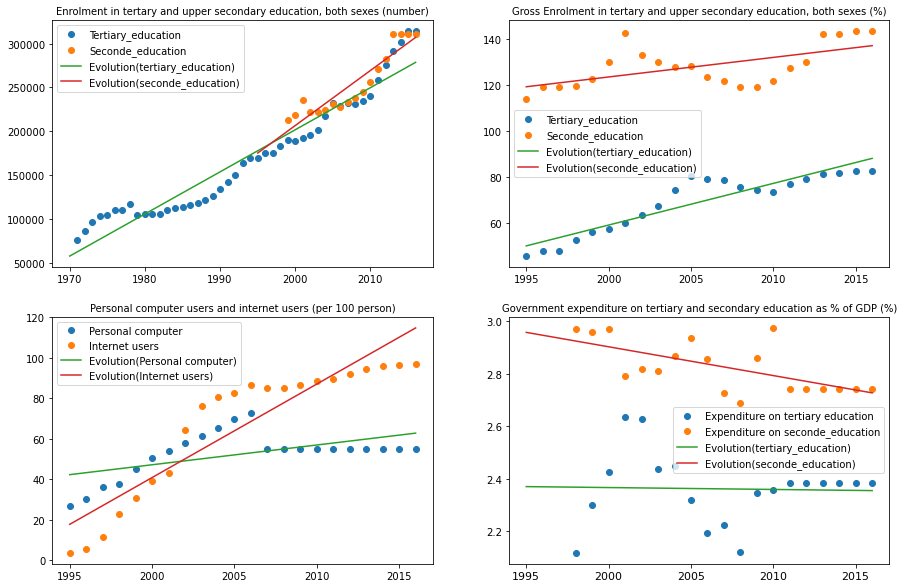

In [46]:
build_plot_for_country(pays='Denmark', start_year1=1995, end_years1=2016, start_year2=1970, end_years2=2016)


# 3.Norway

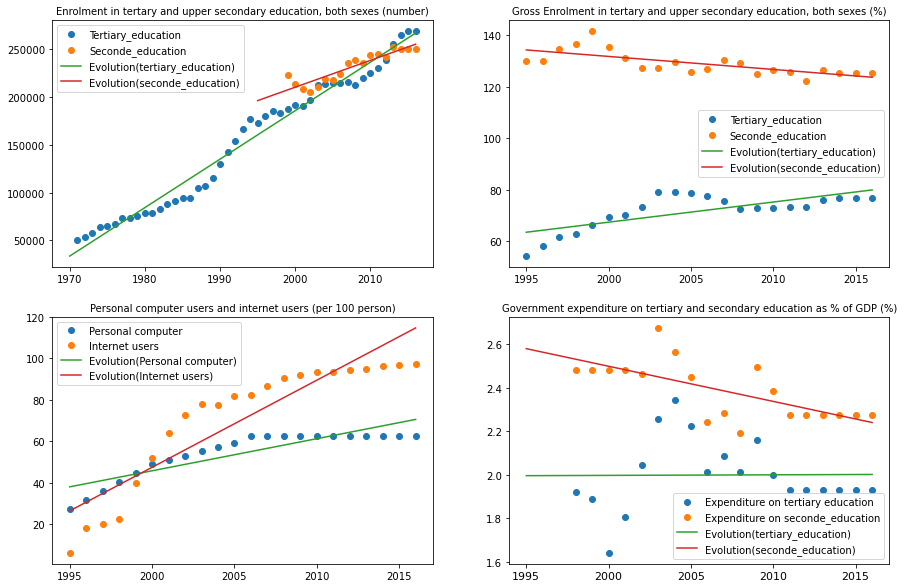

In [47]:
build_plot_for_country(pays='Norway', start_year1=1995, end_years1=2016, start_year2=1970, end_years2=2016)

# 4 .Finland

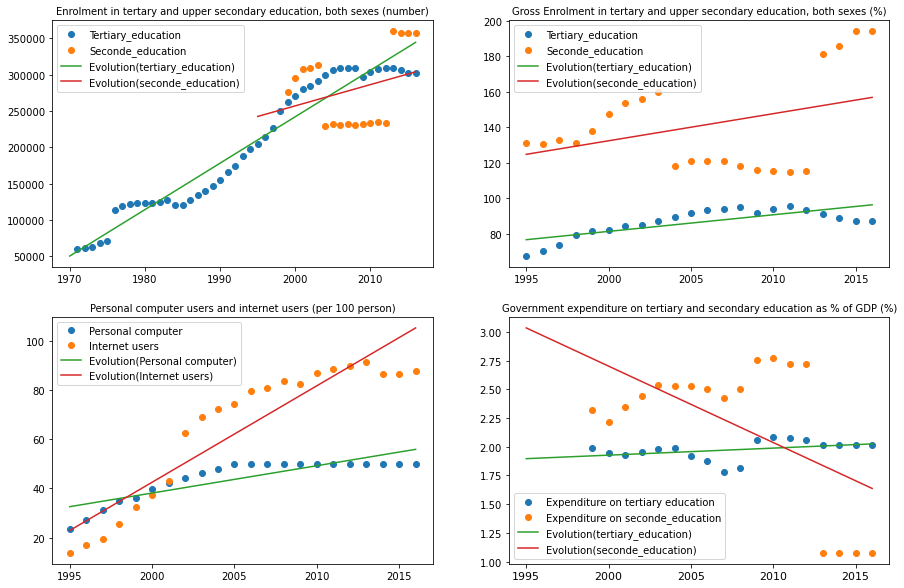

In [48]:

build_plot_for_country(pays='Finland', start_year1=1995, end_years1=2016, start_year2=1970, end_years2=2016)

# 5.Australia

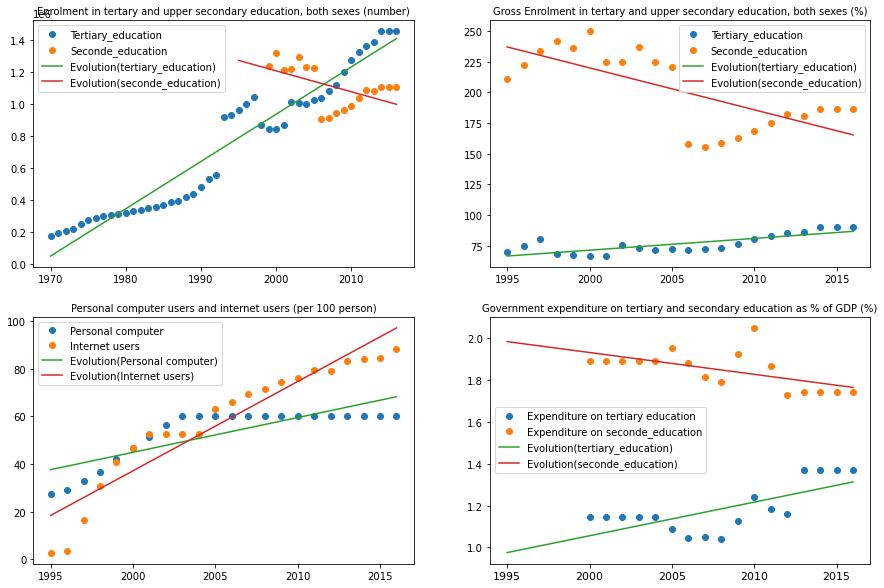

In [49]:
build_plot_for_country(pays='Australia', start_year1=1995, end_years1=2016, start_year2=1970, end_years2=2016)

# 6. United States

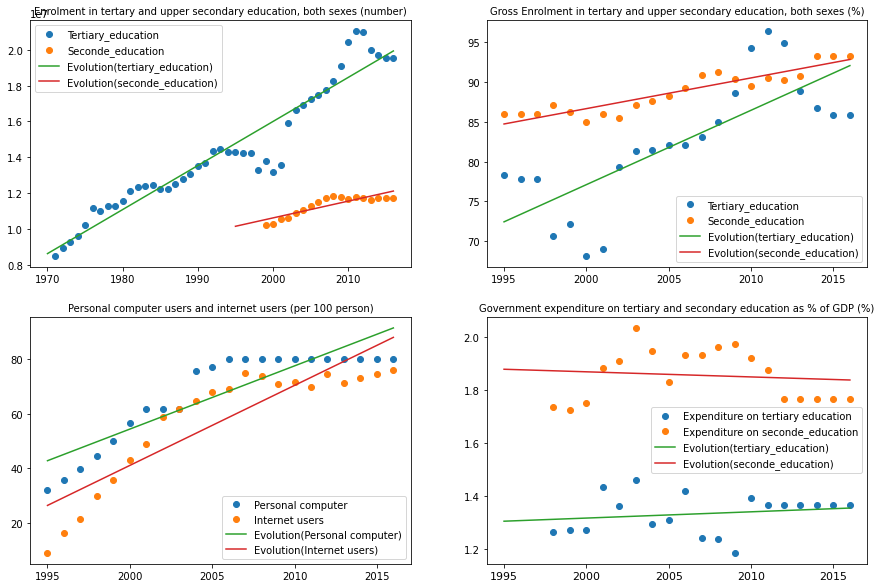

In [50]:
build_plot_for_country(pays='United States', start_year1=1995, end_years1=2016, start_year2=1970, end_years2=2016)

# 7. New Zealand

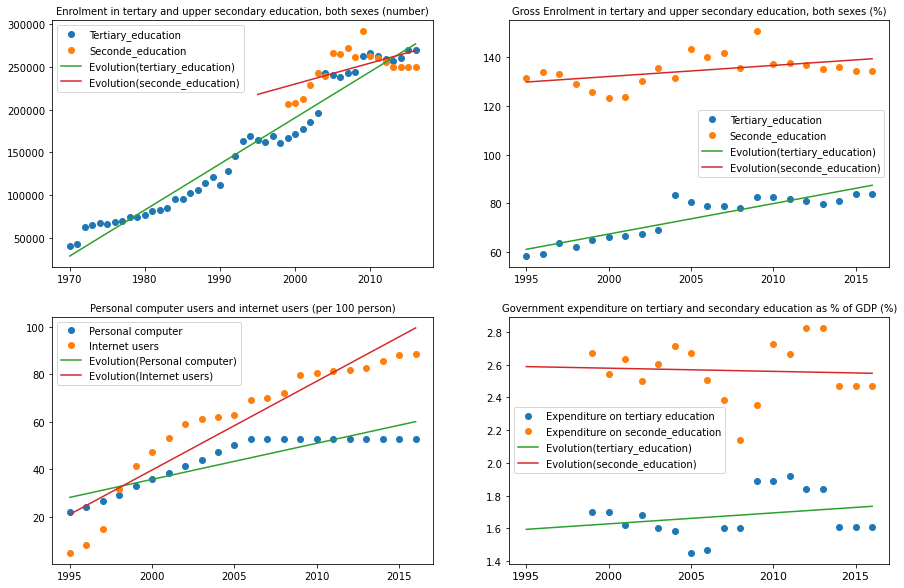

In [51]:
build_plot_for_country(pays='New Zealand', start_year1=1995, end_years1=2016, start_year2=1970, end_years2=2016)

# 8. Netherlands

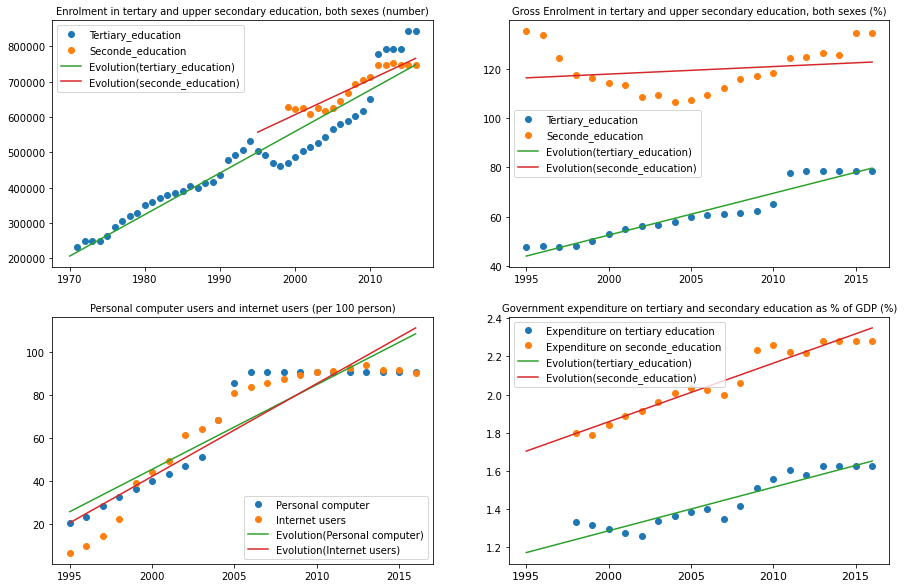

In [52]:
build_plot_for_country(pays='Netherlands', start_year1=1995, end_years1=2016, start_year2=1970, end_years2=2016)

# 9.Canada

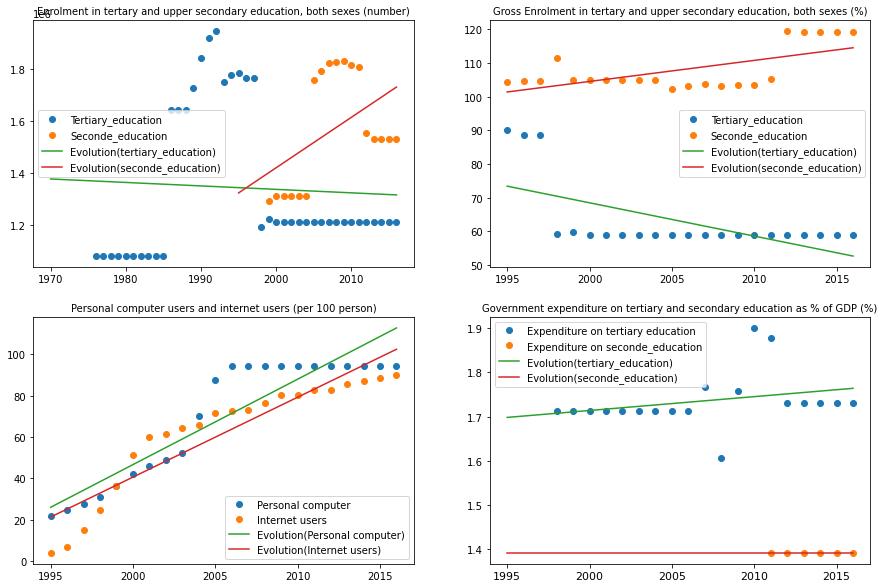

In [53]:
build_plot_for_country(pays='Canada', start_year1=1995, end_years1=2016, start_year2=1970, end_years2=2016)

# 10. Iceland

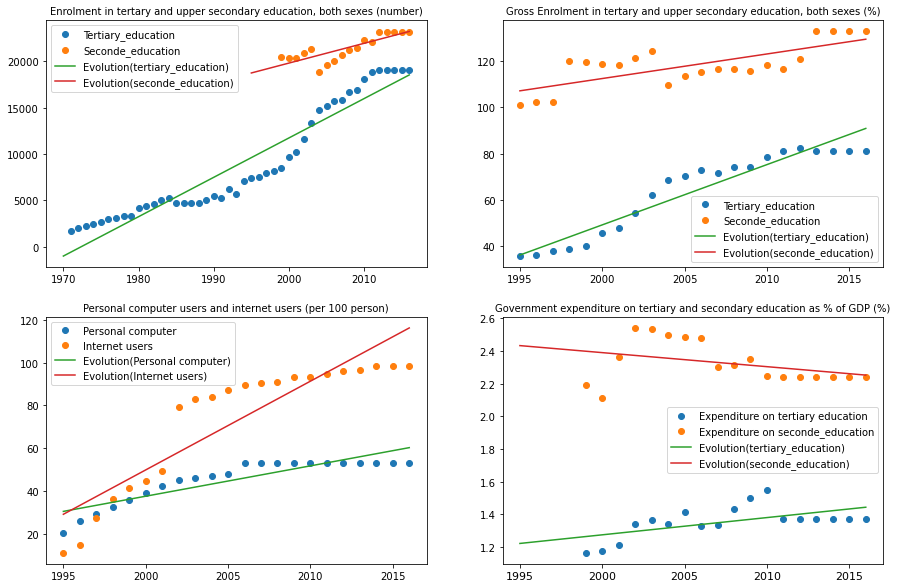

In [54]:
build_plot_for_country(pays='Iceland', start_year1=1995, end_years1=2016, start_year2=1970, end_years2=2016)

# Dans quels pays l'entreprise doit-elle opérer en priorité ?
Réponse : Après avoir calculer les pentes des courbes fitté et les coefficient de corrélation entre les années et les nombre de tous les indicateurs, je vais conseiiler à l'entreprise d'opérer le projet d’expansion à l’international dans les pays suivents: Finland, United States, Australia, Netherlands. Parce que les populations à l'université et au lycée sont grands et les autres indicateurs s'accroissent chaque année du coup, cela veux dire que ils presente une potentiel de clients les plus forts.